# Data integration Hung at al, 2020
references

* Paper: https://www.pnas.org/content/117/3/1514
* GEO: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE120537
* Github: https://github.com/hbc/drosophila-midgut-analysis

Method
https://swaruplab.bio.uci.edu/tutorial/integration/integration_tutorial.html


In [2]:
suppressPackageStartupMessages({
    library(Seurat)
    library(SeuratWrappers)
    library(tidyverse)
    library(patchwork)
    library(viridis)
    library(readr)
    library(SeuratDisk)
    library(ggplot2)
    
    #library(reticulate)
    #library(MAST)
    #library(velocyto.R)
    #library(monocle3)
    #library(ggplot2)
    #library(magrittr)
})
options(warn=-1)
set.seed(1234)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


### Include suffix to differentiate our data to Hung

In [3]:
## Parameters

# point size
point_size = 0.5
width_size = 6
height_size = 6

# color scheme
ident_colours = c('#8B93FF', #EB1
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#00BBDA', #EC-like
                  '#24B700', #EB3
                  '#00BE70', #EB2
                  '#BE9C00', #mEC
                  '#00ACFC', #AstC+EE
                  '#D575FE', #apEC
                  '#F8766D', #Tk+EE
                  '#8CAB00', #cluster0
                  '#F962DD', #cluster1
                  '#00C1AB')

In [4]:
#rm(so)
# Load Nakajima and Nagai dataset
#so <- readRDS('Seurat_aggr_wo_hemo_ukwn.rds')
so <- readRDS('datasets/seurat/Seurat_aggr_QC2.rds')
#so <- readRDS('Seurat_aggr.rds') #no RNA assay
#so <- readRDS('Seurat_aggr.20210503.rds') #no RNA assay
#so <- SCTransform(so, method = "glmGamPoi", verbose = FALSE)

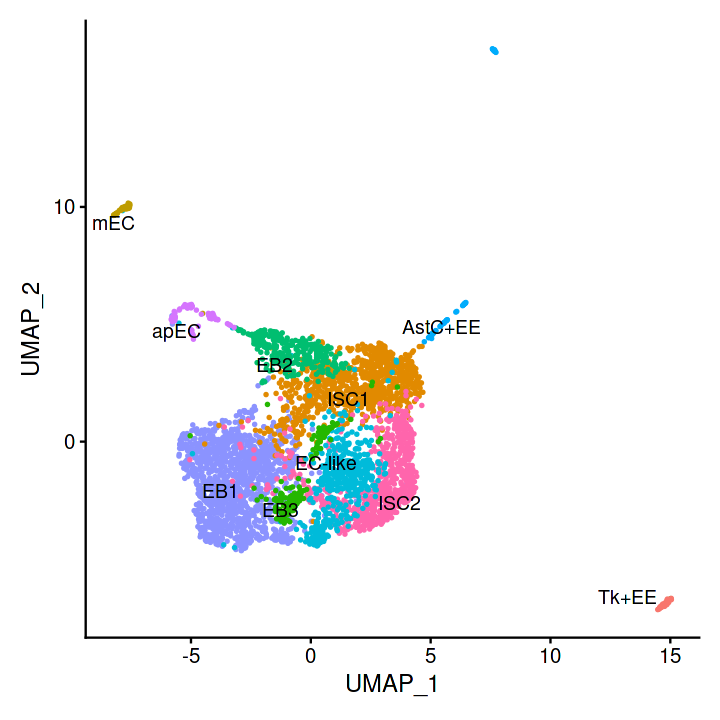

In [5]:
Idents(object = so) <- so$clusters
options(repr.plot.width = width_size, repr.plot.height = height_size)

# Figure without axis lines
#DimPlot(object = so, reduction = "umap", 
#        label = TRUE, 
#        label.size = 5,
#        repel = TRUE, 
#        pt.size = point_size,
#        cols = ident_colours) +
#        NoLegend() + NoAxes() 
#ggsave("Fig3a_UMAP_all_noAxes.pdf", width = width_size, height = height_size)

DimPlot(object = so, reduction = "umap", order = TRUE,
        label = TRUE, 
        repel = TRUE, 
        pt.size = point_size, 
        cols = ident_colours) +
        NoLegend()

### Change our labels to not mix with Hung

In [6]:
so
levels(so)

An object of class Seurat 
51496 features across 4184 samples within 4 assays 
Active assay: SCT (9607 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, spliced
 2 dimensional reductions calculated: pca, umap

[1] "EB1"     "ISC1"    "ISC2"    "EC-like" "EB3"     "EB2"     "mEC"    
 [8] "AstC+EE" "apEC"    "Tk+EE"

In [7]:
so <- RenameIdents(so, "apEC" = "our_apEC")
so <- RenameIdents(so, "AstC+EE" = "our_AstC+EE")
so <- RenameIdents(so, "EB1" = "our_EB1")
so <- RenameIdents(so, "EB2" = "our_EB2")
so <- RenameIdents(so, "EB3" = "our_EB3")
so <- RenameIdents(so, "EC-like" = "our_EC-like")
so <- RenameIdents(so, "ISC1" = "our_ISC1")
so <- RenameIdents(so, "ISC2" = "our_ISC2")
so <- RenameIdents(so, "mEC" = "our_mEC")
so <- RenameIdents(so, "Tk+EE" = "our_Tk+EE")
so[["clusters"]] <- Idents(object = so)

In [8]:
table(Idents(object = so))


  our_Tk+EE     our_mEC    our_ISC2    our_ISC1 our_EC-like     our_EB3 
         54          51         681         895         514         165 
    our_EB2     our_EB1 our_AstC+EE    our_apEC 
        306        1369          68          81 

In [9]:
levels(so)

[1] "our_Tk+EE"   "our_mEC"     "our_ISC2"    "our_ISC1"    "our_EC-like"
 [6] "our_EB3"     "our_EB2"     "our_EB1"     "our_AstC+EE" "our_apEC"

In [10]:
table(so$sample)


1DAE 3DAE 
2711 1473 

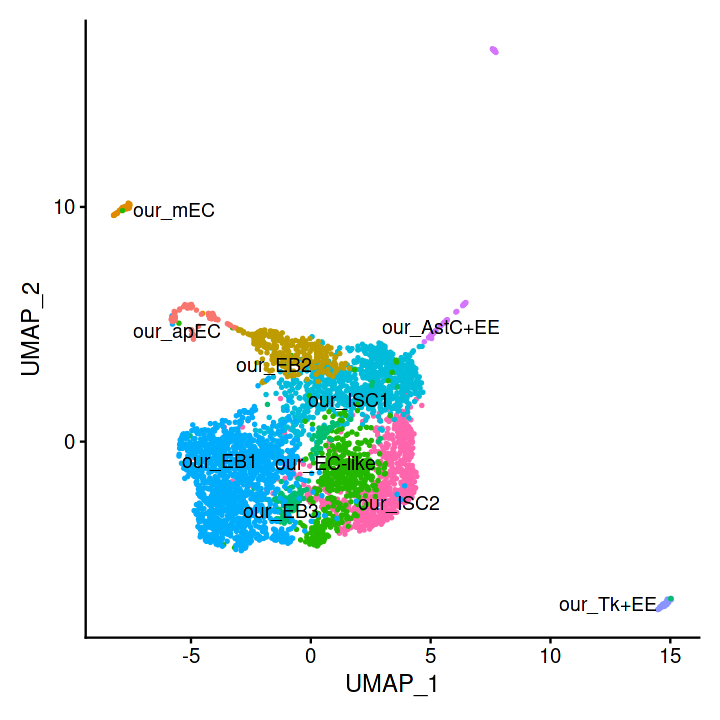

In [11]:
Idents(object = so) <- so$clusters
options(repr.plot.width = width_size, repr.plot.height = height_size)

DimPlot(object = so, reduction = "umap", order = TRUE,
        label = TRUE, 
        repel = TRUE, 
        pt.size = point_size, 
        cols = ident_colours) +
        NoLegend()

In [12]:
# Replace the splice assay to RNA
so <- RenameAssays(so, spliced="RNA")

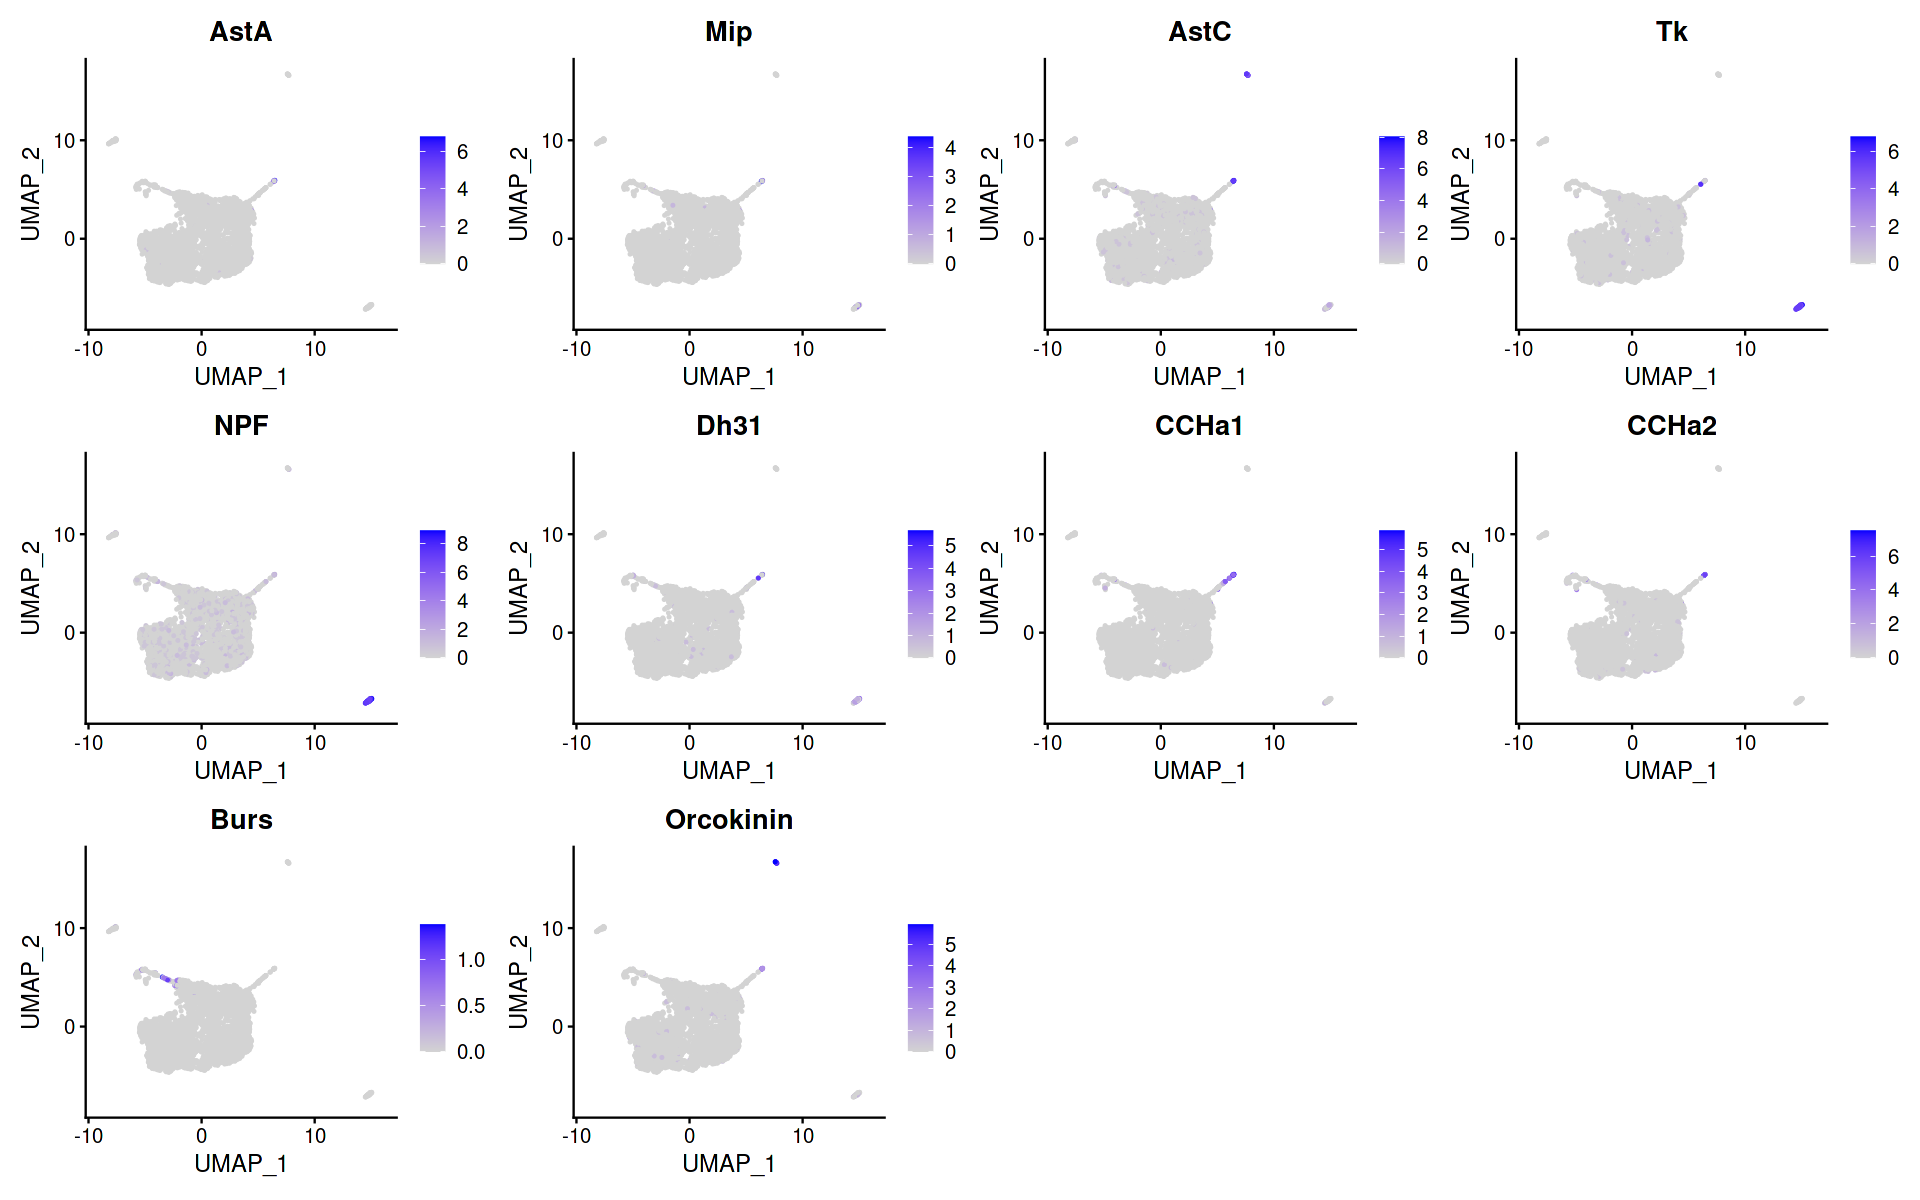

In [13]:
# EE important genes
markergenes <- c("AstA", "Mip", "AstC", "Tk", "NPF", "Dh31", "CCHa1", "CCHa2", "Burs", "Orcokinin")

options(repr.plot.width = 16, repr.plot.height = 10)
FeaturePlot(object = so,
            features = markergenes,
            cols = c("lightgrey", "blue"), 
            reduction= "umap")

In [14]:
# Read the reference from Hung
reference <- readRDS("datasets/Hung_etal_2020/results/hung2020.rds")
#reference <- SCTransform(reference, verbose = FALSE)

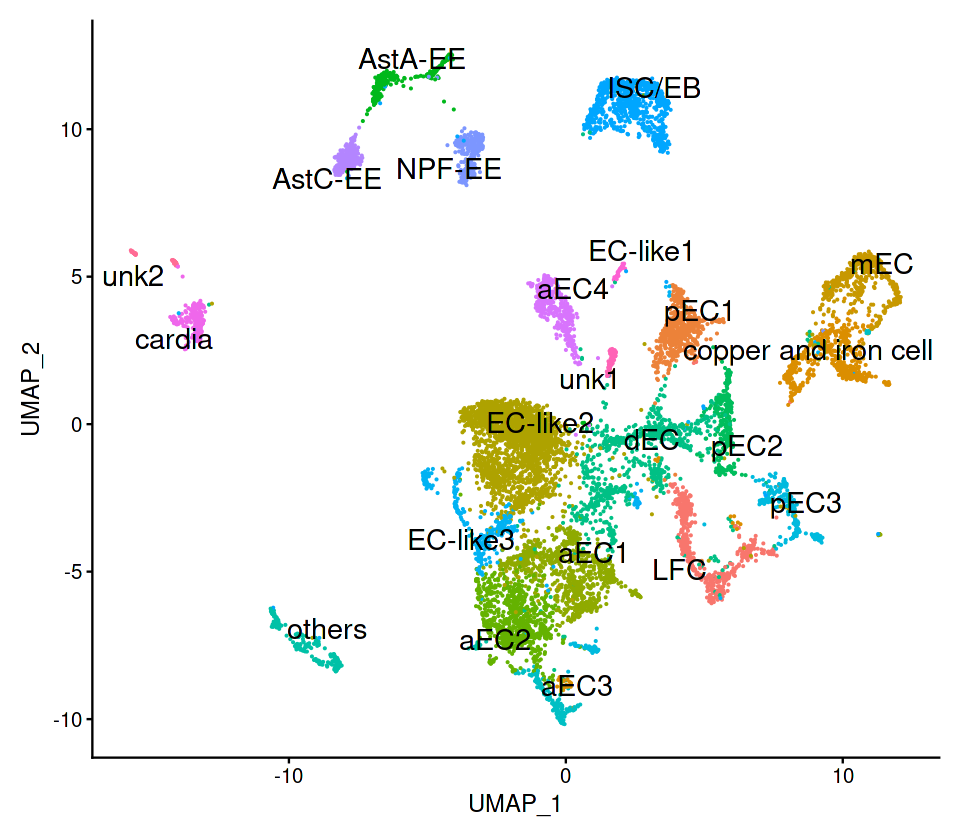

In [15]:
options(repr.plot.width = 8, repr.plot.height = 7)
DimPlot(reference, reduction = "umap", label = TRUE, pt.size = 0.1, label.size = 6, repel = TRUE) + NoLegend()
ggsave("paper_figures/FigS4a_Hung_UMAP.pdf", width = 8, height = 7)

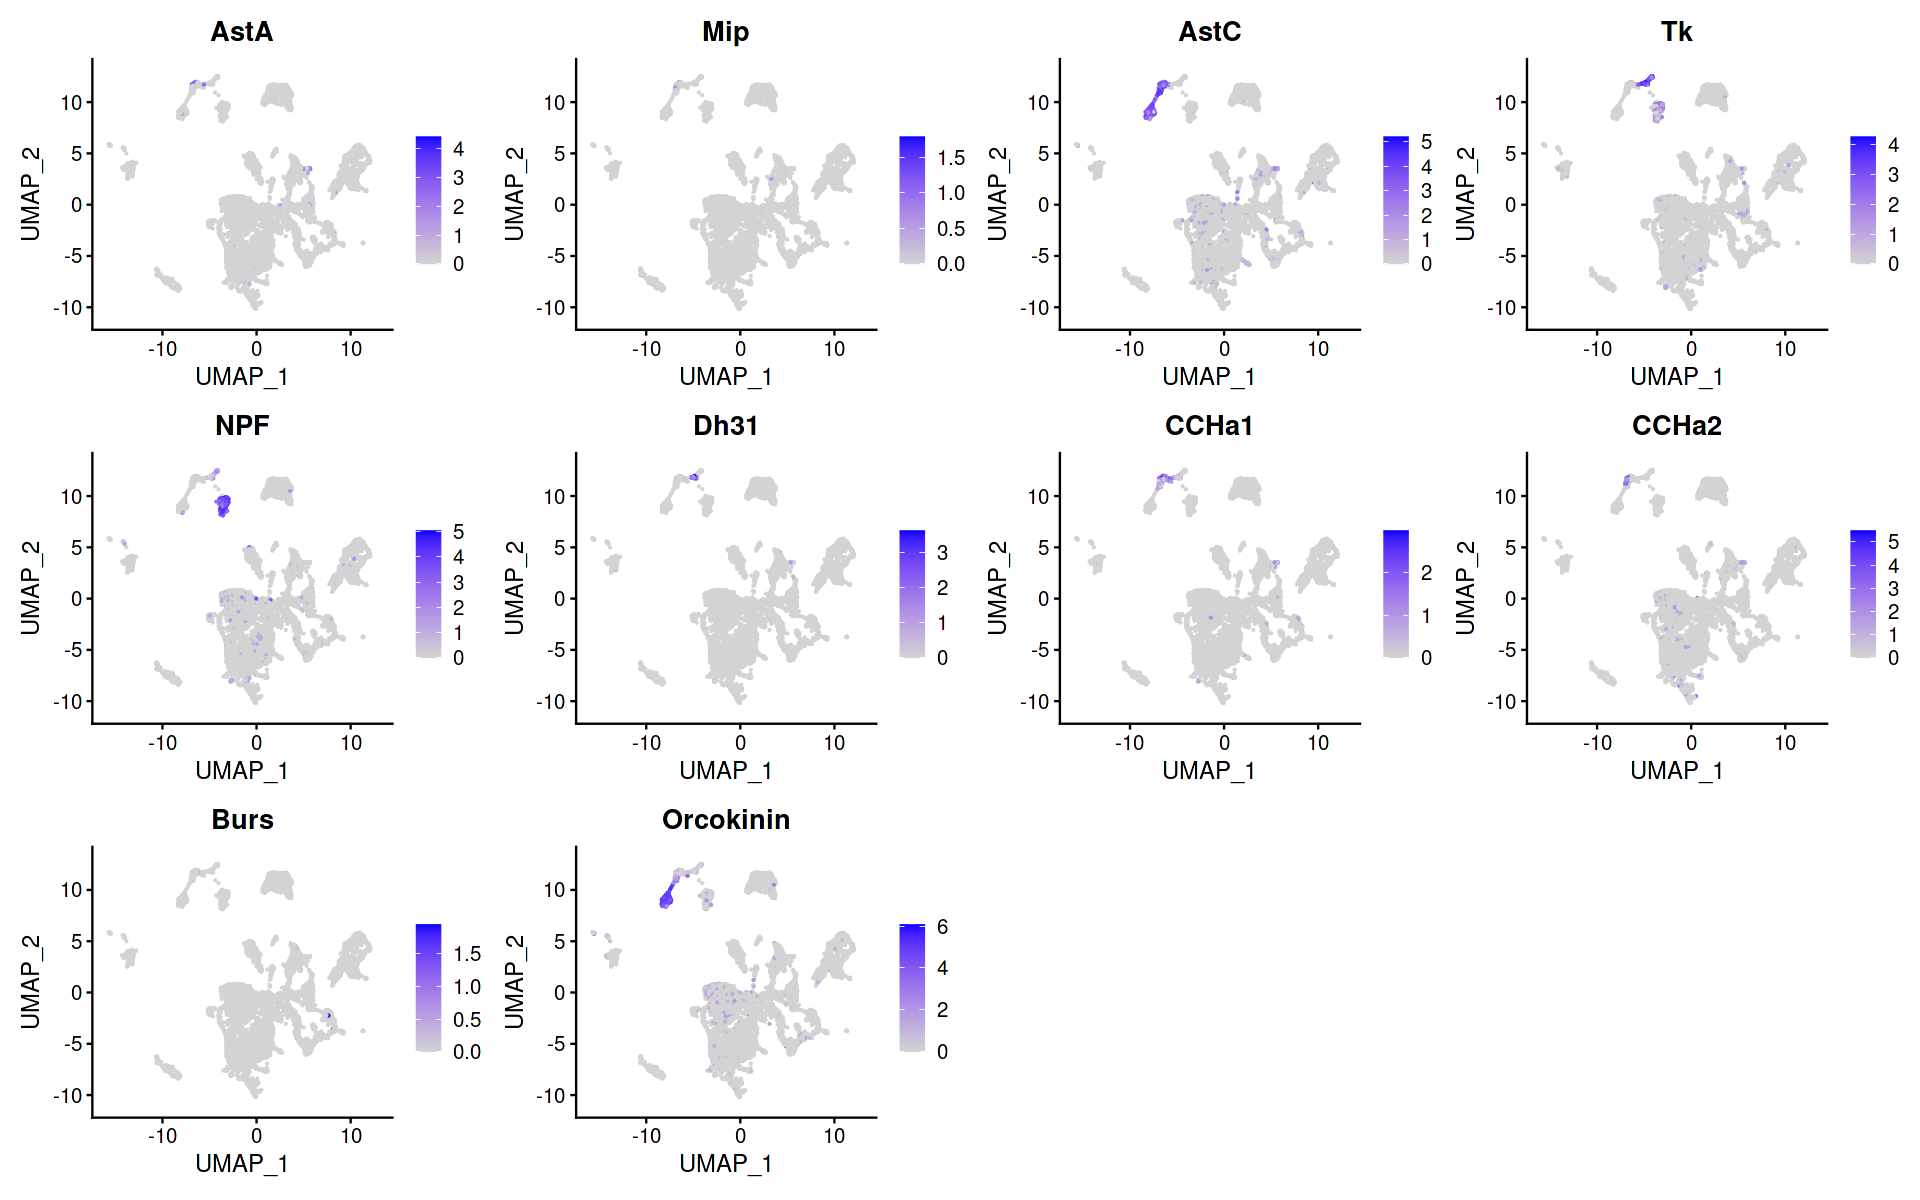

In [16]:
# EE important genes
markergenes <- c("AstA", "Mip", "AstC", "Tk", "NPF", "Dh31", "CCHa1", "CCHa2", "Burs", "Orcokinin")

options(repr.plot.width = 16, repr.plot.height = 10)
FeaturePlot(object = reference,
            features = markergenes,
            cols = c("lightgrey", "blue"), 
            reduction= "umap")

# RPCA method

In [17]:
to_integrate <- list(query = so, reference = reference)
to_integrate <- map(to_integrate, SCTransform) #, method = 'glmGamPoi') 

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9607 by 4184

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4184 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 127 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9607 genes



  |======================================================================| 100%


Computing corrected count matrix for 9607 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 51.10697 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10109 by 10605

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 91 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10109 genes



  |======================================================================| 100%


Computing corrected count matrix for 10109 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.313189 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [18]:
to_integrate_features <- SelectIntegrationFeatures(object.list = to_integrate)
to_integrate <- PrepSCTIntegration(object.list = to_integrate, anchor.features = to_integrate_features)
to_integrate <- lapply(X = to_integrate, FUN = RunPCA, features = to_integrate_features)

to_integrate_anchors <- FindIntegrationAnchors(object.list = to_integrate, 
                                               normalization.method = "SCT", 
                                               anchor.features = to_integrate_features, 
                                               dims = 1:30,
                                               reduction = "rpca", 
                                               k.anchor = 20)

PC_ 1 
Positive:  RpL41, RpL27A, bun, RpLP1, Myc, RpL37a, unc-104, hdc, CG17778, Tet 
	   cib, mt:CoIII, Sirup, E(spl)malpha-BFM, Prx2540-1, peb, Df31, RpL39, E(spl)mbeta-HLH, CG1648 
	   eEF1alpha1, CG6357, Cirl, ATP8B, Dtg, mt:CoI, Nrt, E(spl)m3-HLH, path, mt:CoII 
Negative:  CG13321, Tsp29Fb, CG15347, Ssk, CG15422, CG44014, Tsp2A, CG5011, CG43349, CG34288 
	   CG1246, Fst, CG13315, lectin-37Db, CG12974, Pebp1, CG15152, GstE3, Argk, CG12780 
	   CG32633, CG15211, CG10912, CG15423, CG5399, Agpat4, CG32687, Oatp33Eb, hiro, Cyp12a4 
PC_ 2 
Positive:  unc-104, Prx2540-1, Prx2540-2, Thor, CG34198, CG12896, CG17778, stl, CG30090, RpL27A 
	   CG11825, Sirup, bun, CG44085, Lsd-2, ATP8B, CG32264, CG17145, CG5254, hebe 
	   CG6770, pirk, GstT4, RpLP1, mt:CoIII, CG9360, CG12991, Msp300, Vha68-2, Vha26 
Negative:  Tsp42Ee, CG1943, HmgD, dUTPase, alphaTub84B, Cpr51A, Cyt-c-p, Fkbp39, PCNA, Df31 
	   Jafrac1, smt3, hoip, CG12926, awd, babos, CG7142, HmgZ, Dl, Prip 
	   Ran, His2Av, Jupiter, CG1126

In [19]:
combined.sct <- IntegrateData(anchorset = to_integrate_anchors, 
                              normalization.method = "SCT", 
                              dims = 1:30) 

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [20]:
combined.sct <- RunPCA(combined.sct, verbose = FALSE)
combined.sct <- RunUMAP(combined.sct, reduction = "pca", dims = 1:30)

16:48:51 UMAP embedding parameters a = 0.9922 b = 1.112

16:48:51 Read 14789 rows and found 30 numeric columns

16:48:51 Using Annoy for neighbor search, n_neighbors = 30

16:48:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:48:55 Writing NN index file to temp file /tmp/Rtmp4CkSNJ/file135069359863bf

16:48:55 Searching Annoy index using 1 thread, search_k = 3000

16:49:00 Annoy recall = 100%

16:49:00 Commencing smooth kNN distance calibration using 1 thread

16:49:02 Initializing from normalized Laplacian + noise

16:49:03 Commencing optimization for 200 epochs, with 628628 positive edges

16:49:10 Optimization finished



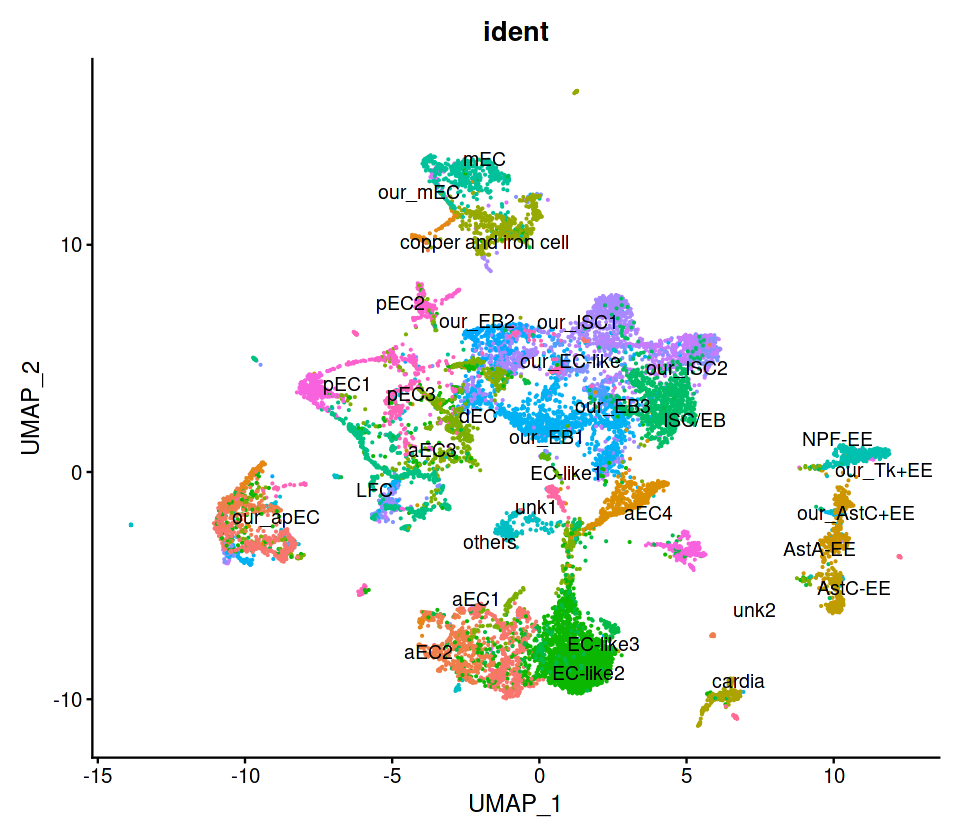

In [21]:
options(repr.plot.width = 8, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", group.by = "ident", label = TRUE,
    repel = TRUE) + NoLegend()

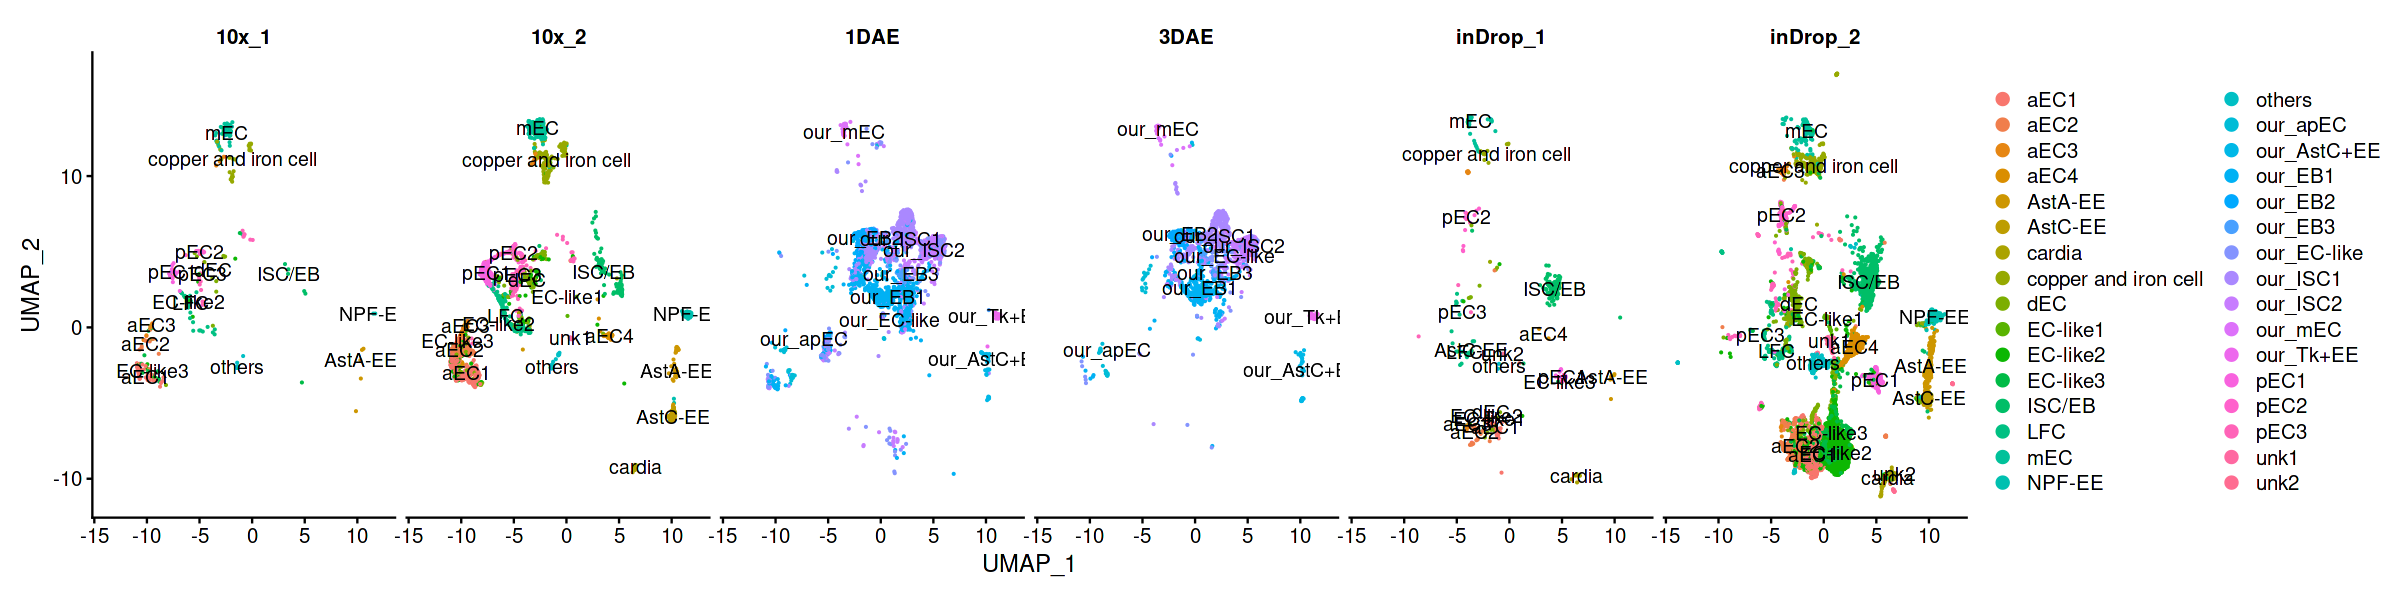

In [22]:
options(repr.plot.width = 20, repr.plot.height = 5)
DimPlot(combined.sct, reduction = "umap", split.by = "sample", label = TRUE,
    repel = FALSE)

In [23]:
table(combined.sct$clusters)


   our_apEC our_AstC+EE     our_EB1     our_EB2     our_EB3 our_EC-like 
         81          68        1369         306         165         514 
   our_ISC1    our_ISC2     our_mEC   our_Tk+EE 
        895         681          51          54 

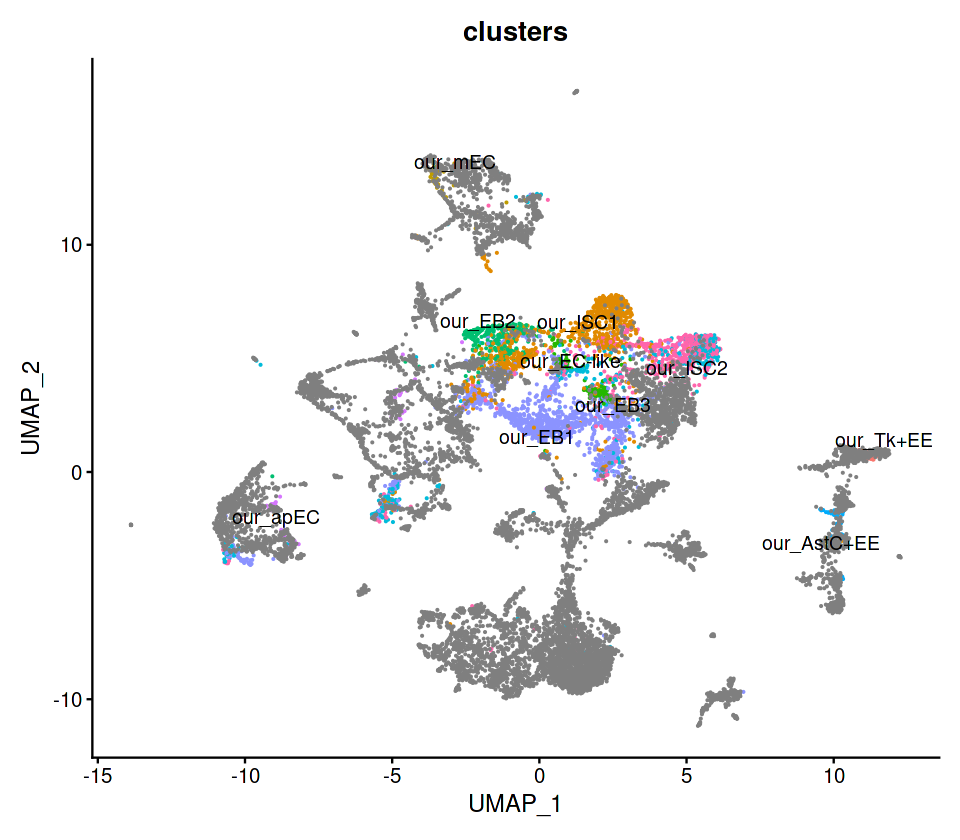

In [24]:
# Let's see how it looks now

ident_colours = c('#D575FE', #apEC
                  '#00ACFC', #AstC+EE
                  '#8B93FF', #EB1
                  '#00BE70', #EB2
                  '#24B700', #EB3
                  '#00BBDA', #EC-like
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#BE9C00', #mEC
                  '#F8766D', #Tk+EE
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3')


options(repr.plot.width = 8, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", group.by = "clusters", label = TRUE, pt.size = 0.1,
        cols = ident_colours,
        repel = TRUE, label.size = 4) + NoLegend()
ggsave("paper_figures/FigS4a_Hung_UMAP_integrated.pdf", width = 8, height = 7)

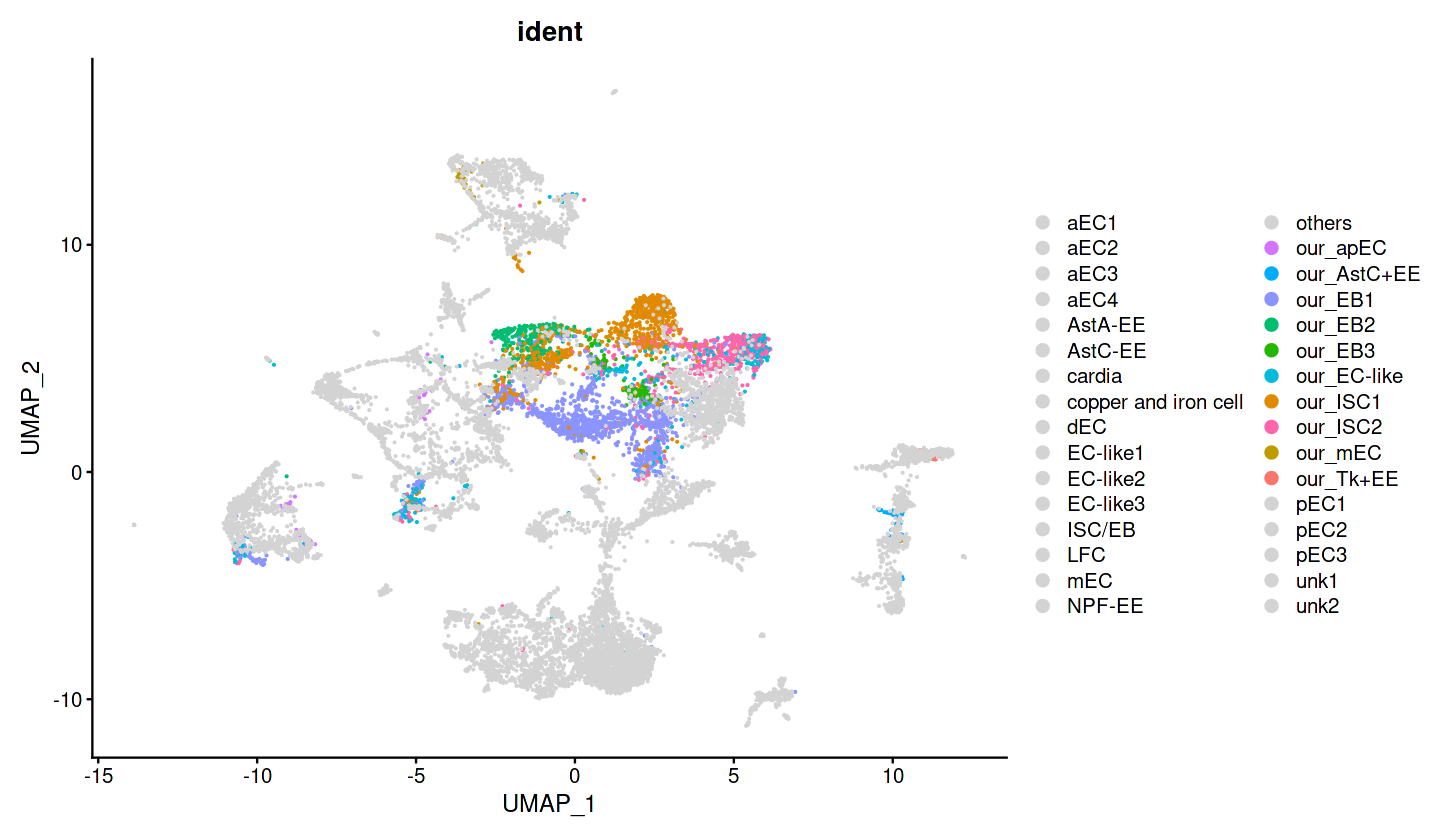

In [25]:
# Let's see how it looks now

ident_colours = c('#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D575FE', #apEC
                  '#00ACFC', #AstC+EE
                  '#8B93FF', #EB1
                  '#00BE70', #EB2
                  '#24B700', #EB3
                  '#00BBDA', #EC-like
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#BE9C00', #mEC
                  '#F8766D', #Tk+EE
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3')


options(repr.plot.width = 12, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", group.by = "ident", label = FALSE, pt.size = 0.1,
        cols = ident_colours,
        repel = TRUE, label.size = 5) 
ggsave("paper_figures/FigS4a_Hung_UMAP_integrated_with_legend.pdf", width = 12, height = 7)

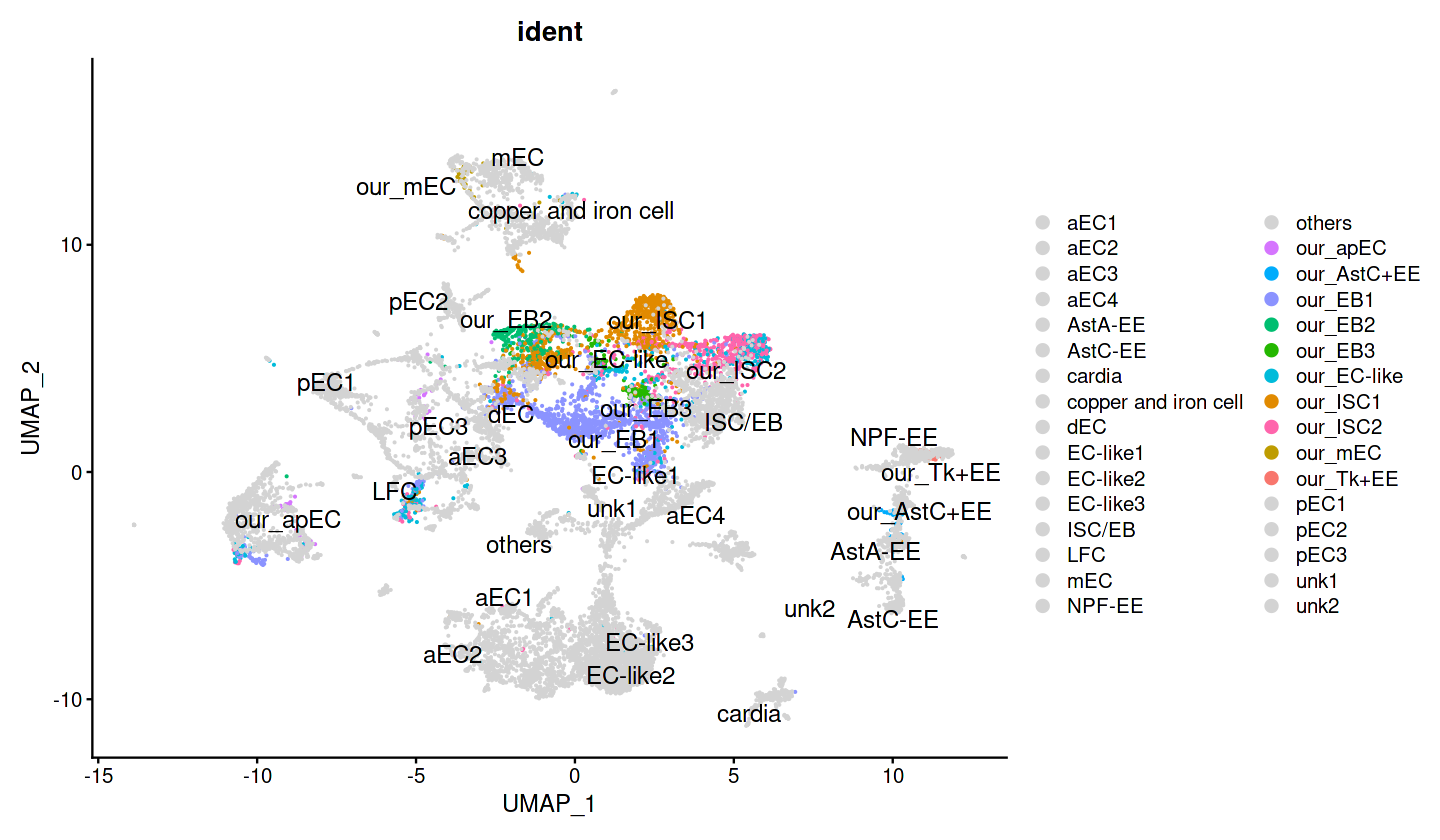

In [26]:
# Let's see how it looks now

ident_colours = c('#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D575FE', #apEC
                  '#00ACFC', #AstC+EE
                  '#8B93FF', #EB1
                  '#00BE70', #EB2
                  '#24B700', #EB3
                  '#00BBDA', #EC-like
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#BE9C00', #mEC
                  '#F8766D', #Tk+EE
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3')


options(repr.plot.width = 12, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", group.by = "ident", label = TRUE, pt.size = 0.1,
        cols = ident_colours,
        repel = TRUE, label.size = 5) 
ggsave("paper_figures/FigS4a_Hung_UMAP_integrated_with_legend2.pdf", width = 12, height = 7)

In [28]:
levels(combined.sct)

[1] "aEC1"                 "aEC2"                 "aEC3"                
 [4] "aEC4"                 "AstA-EE"              "AstC-EE"             
 [7] "cardia"               "copper and iron cell" "dEC"                 
[10] "EC-like1"             "EC-like2"             "EC-like3"            
[13] "ISC/EB"               "LFC"                  "mEC"                 
[16] "NPF-EE"               "others"               "our_apEC"            
[19] "our_AstC+EE"          "our_EB1"              "our_EB2"             
[22] "our_EB3"              "our_EC-like"          "our_ISC1"            
[25] "our_ISC2"             "our_mEC"              "our_Tk+EE"           
[28] "pEC1"                 "pEC2"                 "pEC3"                
[31] "unk1"                 "unk2"

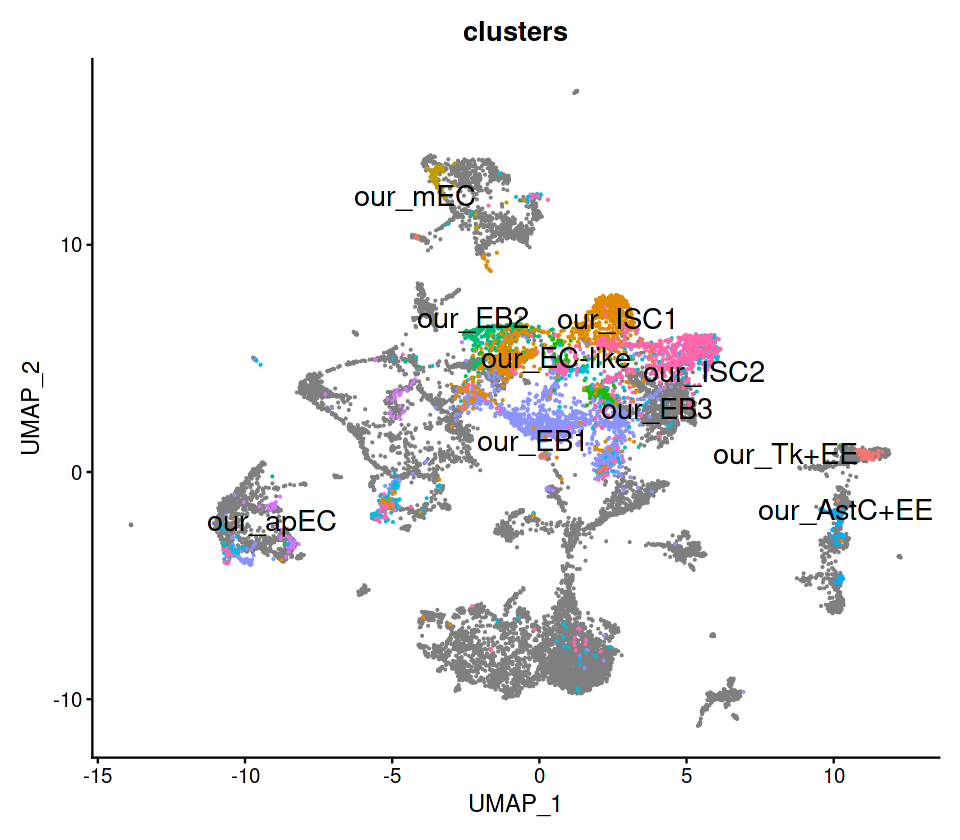

In [29]:
# LEt's plot only our datasets

# color scheme
ident_colours = c('#D575FE', #apEC
                  '#00ACFC', #AstC+EE
                  '#8B93FF', #EB1
                  '#00BE70', #EB2
                  '#24B700', #EB3
                  '#00BBDA', #EC-like
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#BE9C00', #mEC
                  '#F8766D', #Tk+EE
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3')

options(repr.plot.width = 8, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", order = TRUE, 
        group.by = "clusters",
        label = TRUE, repel = TRUE,
        cols = ident_colours,
        pt.size = 0.1, 
        label.size = 6) + NoLegend()
ggsave("paper_figures/FigS4a_Hung_UMAP_integrated_ours_only.pdf", width = 8, height = 7)

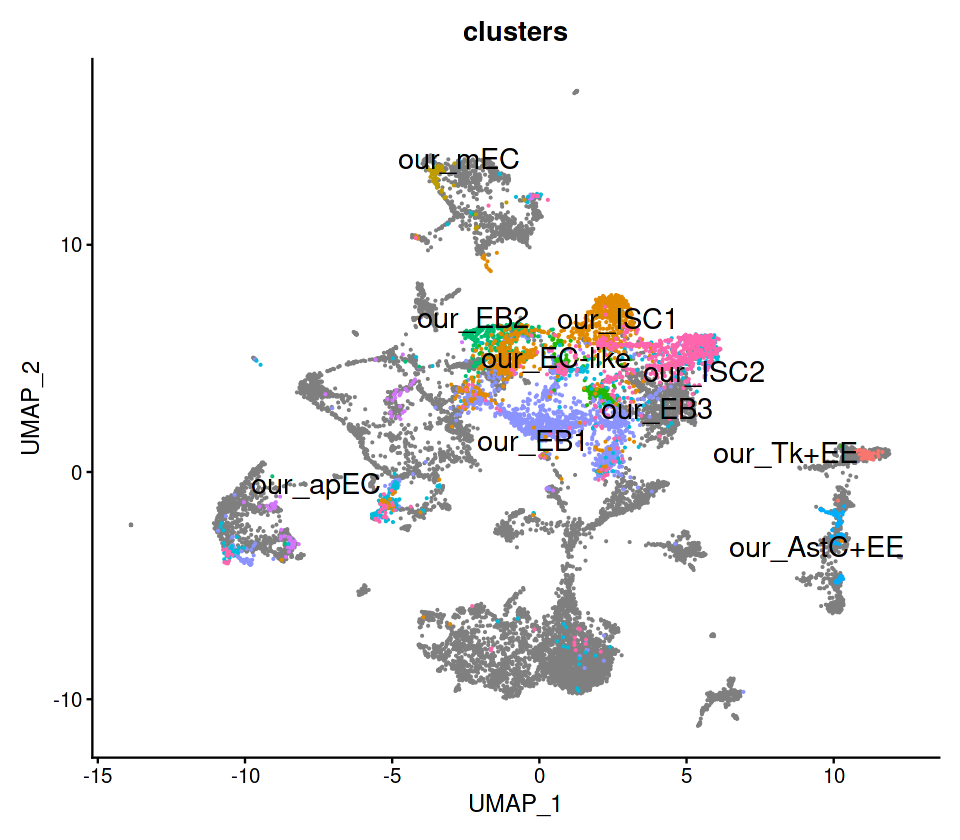

In [30]:
# color scheme
ident_colours = c('#D575FE', #apEC
                  '#00ACFC', #AstC+EE
                  '#8B93FF', #EB1
                  '#00BE70', #EB2
                  '#24B700', #EB3
                  '#00BBDA', #EC-like
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#BE9C00', #mEC
                  '#F8766D', #Tk+EE
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3',
                  '#D3D3D3')

options(repr.plot.width = 8, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", order = TRUE, 
        group.by = "clusters",
        label = TRUE, repel = TRUE,
        cols = ident_colours,
        pt.size = 0.1, 
        label.size = 6) + NoLegend()
ggsave("paper_figures/FigS4a_Hung_UMAP_integrated_ours_only.pdf", width = 8, height = 7)


In [31]:
levels(combined.sct)

length(levels(combined.sct))

[1] "aEC1"                 "aEC2"                 "aEC3"                
 [4] "aEC4"                 "AstA-EE"              "AstC-EE"             
 [7] "cardia"               "copper and iron cell" "dEC"                 
[10] "EC-like1"             "EC-like2"             "EC-like3"            
[13] "ISC/EB"               "LFC"                  "mEC"                 
[16] "NPF-EE"               "others"               "our_apEC"            
[19] "our_AstC+EE"          "our_EB1"              "our_EB2"             
[22] "our_EB3"              "our_EC-like"          "our_ISC1"            
[25] "our_ISC2"             "our_mEC"              "our_Tk+EE"           
[28] "pEC1"                 "pEC2"                 "pEC3"                
[31] "unk1"                 "unk2"

[1] 32

In [33]:
#test <- combined.sct

my_levels <- c("ISC/EB", "our_ISC1", "our_ISC2", 
               "our_EB1", "our_EB2", "our_EB3",
               "aEC1", "aEC2", "aEC3", "aEC4", "dEC", "LFC", 
               "mEC", "our_mEC",
               "EC-like1", "EC-like2", "EC-like3", "our_EC-like",
               "pEC1", "pEC2", "pEC3", "our_apEC",  
               "AstA-EE", "AstC-EE", "NPF-EE", "our_AstC", "our_Tk+EE",
               "cardia", "copper and iron cell", "unk1", "unk2", "others")

Idents(combined.sct) <- factor(Idents(combined.sct), levels= my_levels)

In [36]:
# Before running MDS, we first calculate a distance matrix between all pairs of cells.  Here we
# use a simple euclidean distance metric on all genes, using scale.data as input
d <- dist(t(GetAssayData(combined.sct, slot = "scale.data")))

# Run the MDS procedure, k determines the number of dimensions
mds <- cmdscale(d = d, k = 2)

# cmdscale returns the cell embeddings, we first label the columns to ensure downstream
# consistency
colnames(mds) <- paste0("MDS_", 1:2)

# We will now store this as a custom dimensional reduction called 'mds'
combined.sct[["mds"]] <- CreateDimReducObject(embeddings = mds, key = "MDS_", assay = DefaultAssay(combined.sct))

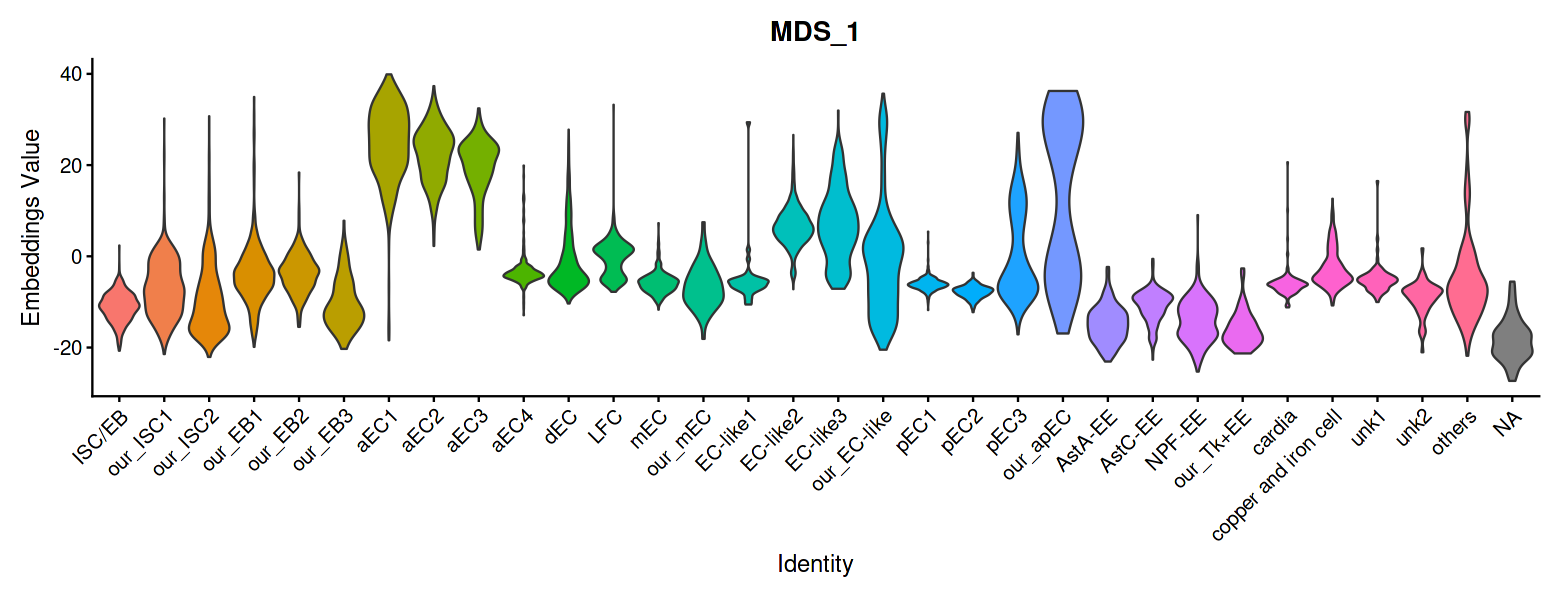

In [37]:
options(repr.plot.width = 13, repr.plot.height = 5)
# Explore how the first MDS dimension is distributed across clusters

VlnPlot(combined.sct, features = "MDS_1", pt.size = 0) + NoLegend()
ggsave("paper_figures/FigS4b_Hung_ViolinMDSplot.pdf", width = 13, height = 5)

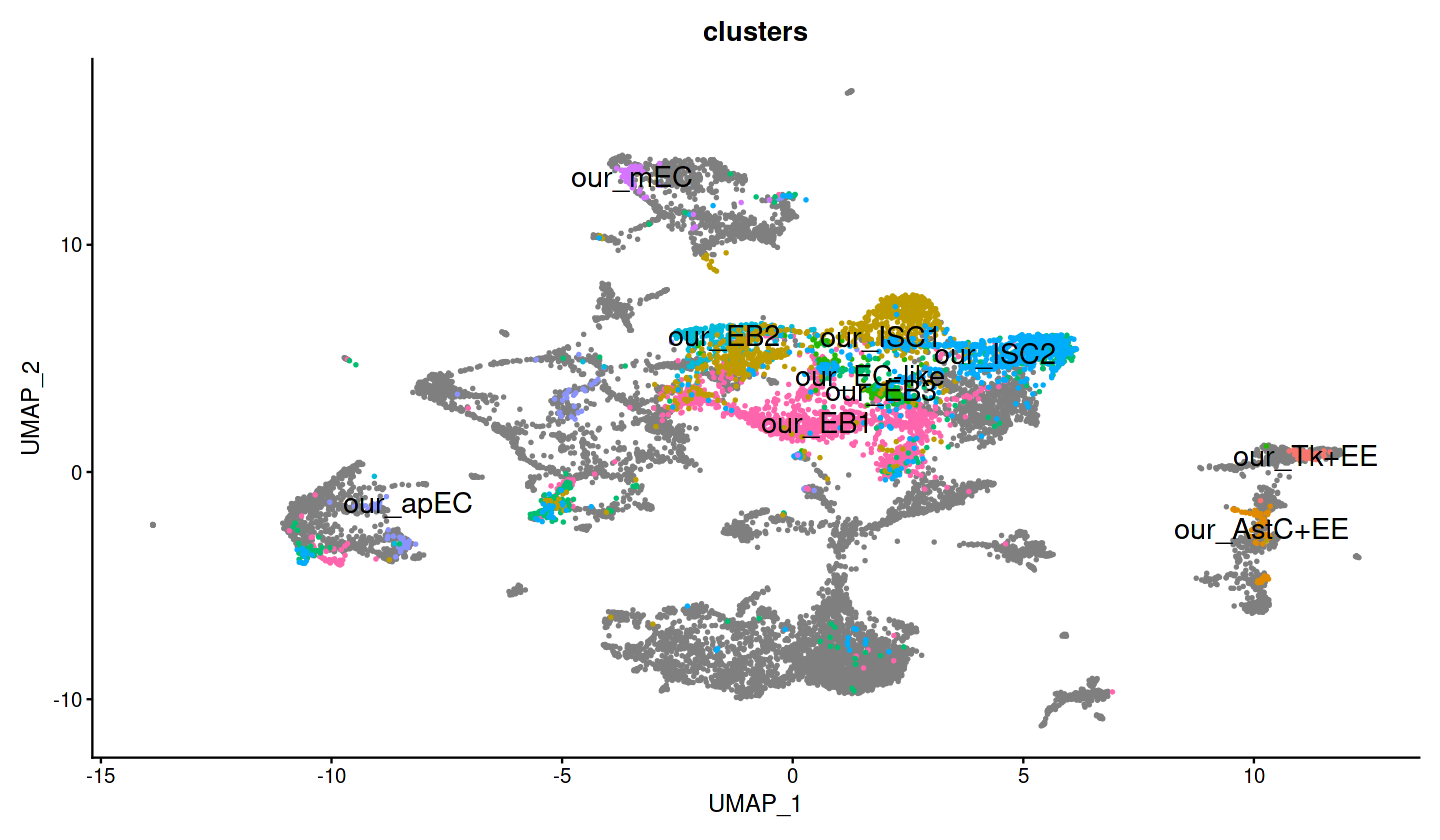

In [52]:
# LEt's plot only our datasets

# color scheme
ident_colours = c('#8B93FF', #EB1
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#00BBDA', #EC-like
                  '#24B700', #EB3
                  '#00BE70', #EB2
                  '#BE9C00', #mEC
                  '#00ACFC', #AstC+EE
                  '#D575FE', #apEC
                  '#F8766D', #Tk+EE
                  '#8CAB00', #cluster0
                  '#F962DD', #cluster1
                  '#00C1AB')

options(repr.plot.width = 12, repr.plot.height = 7)
DimPlot(combined.sct, reduction = "umap", order = TRUE, 
        group.by = "clusters",
        #cells = nagai,
        label = TRUE, 
        cols = ident_colours,
        pt.size = point_size, 
        label.size = 6) + NoLegend()

In [19]:
#https://github.com/satijalab/seurat/issues/3810

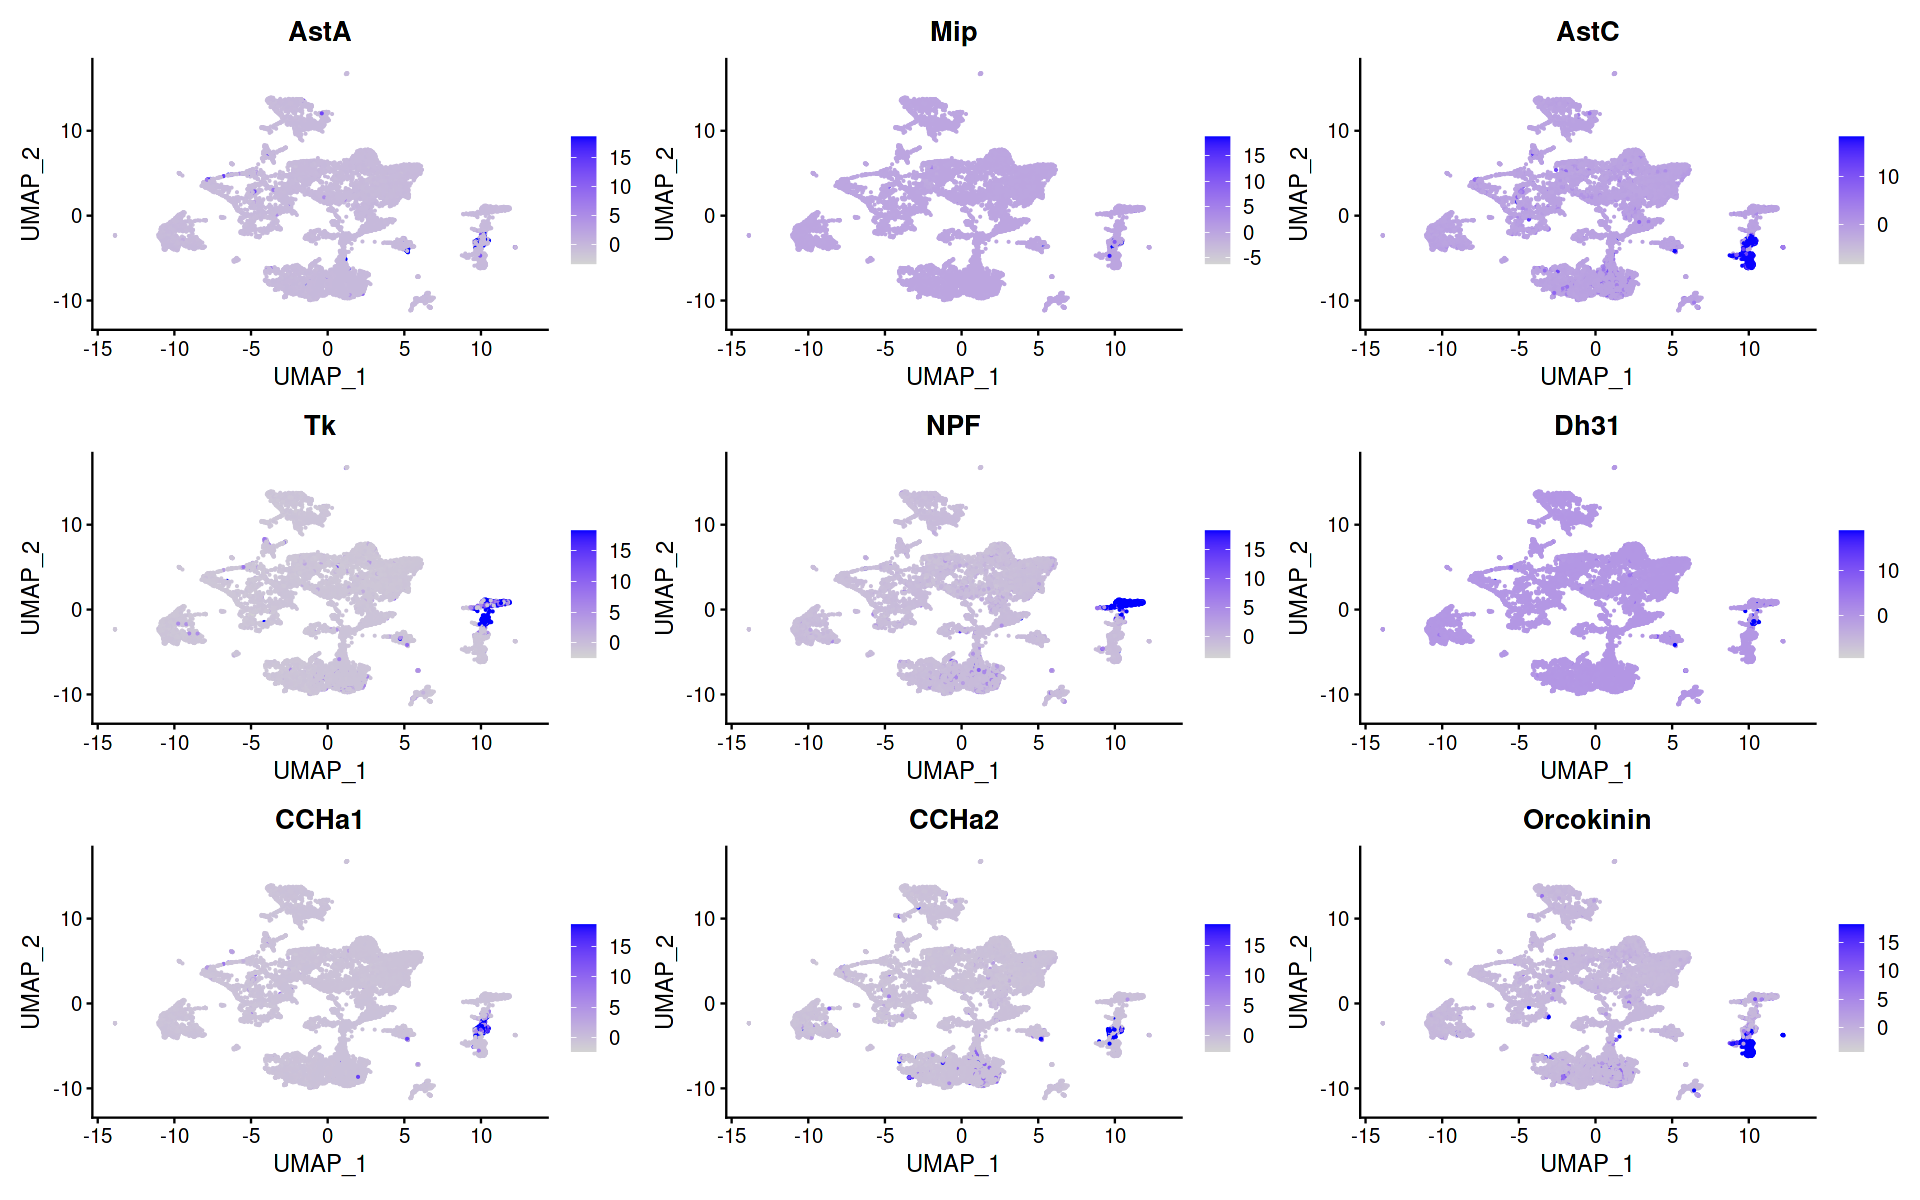

In [52]:
# EE important genes
markergenes <- c("AstA", "Mip", "AstC", "Tk", "NPF", "Dh31", "CCHa1", "CCHa2", "Burs", "Orcokinin")

options(repr.plot.width = 16, repr.plot.height = 10)
FeaturePlot(object = combined.sct,
            features = markergenes,
            cols = c("lightgrey", "blue"), 
            reduction= "umap")

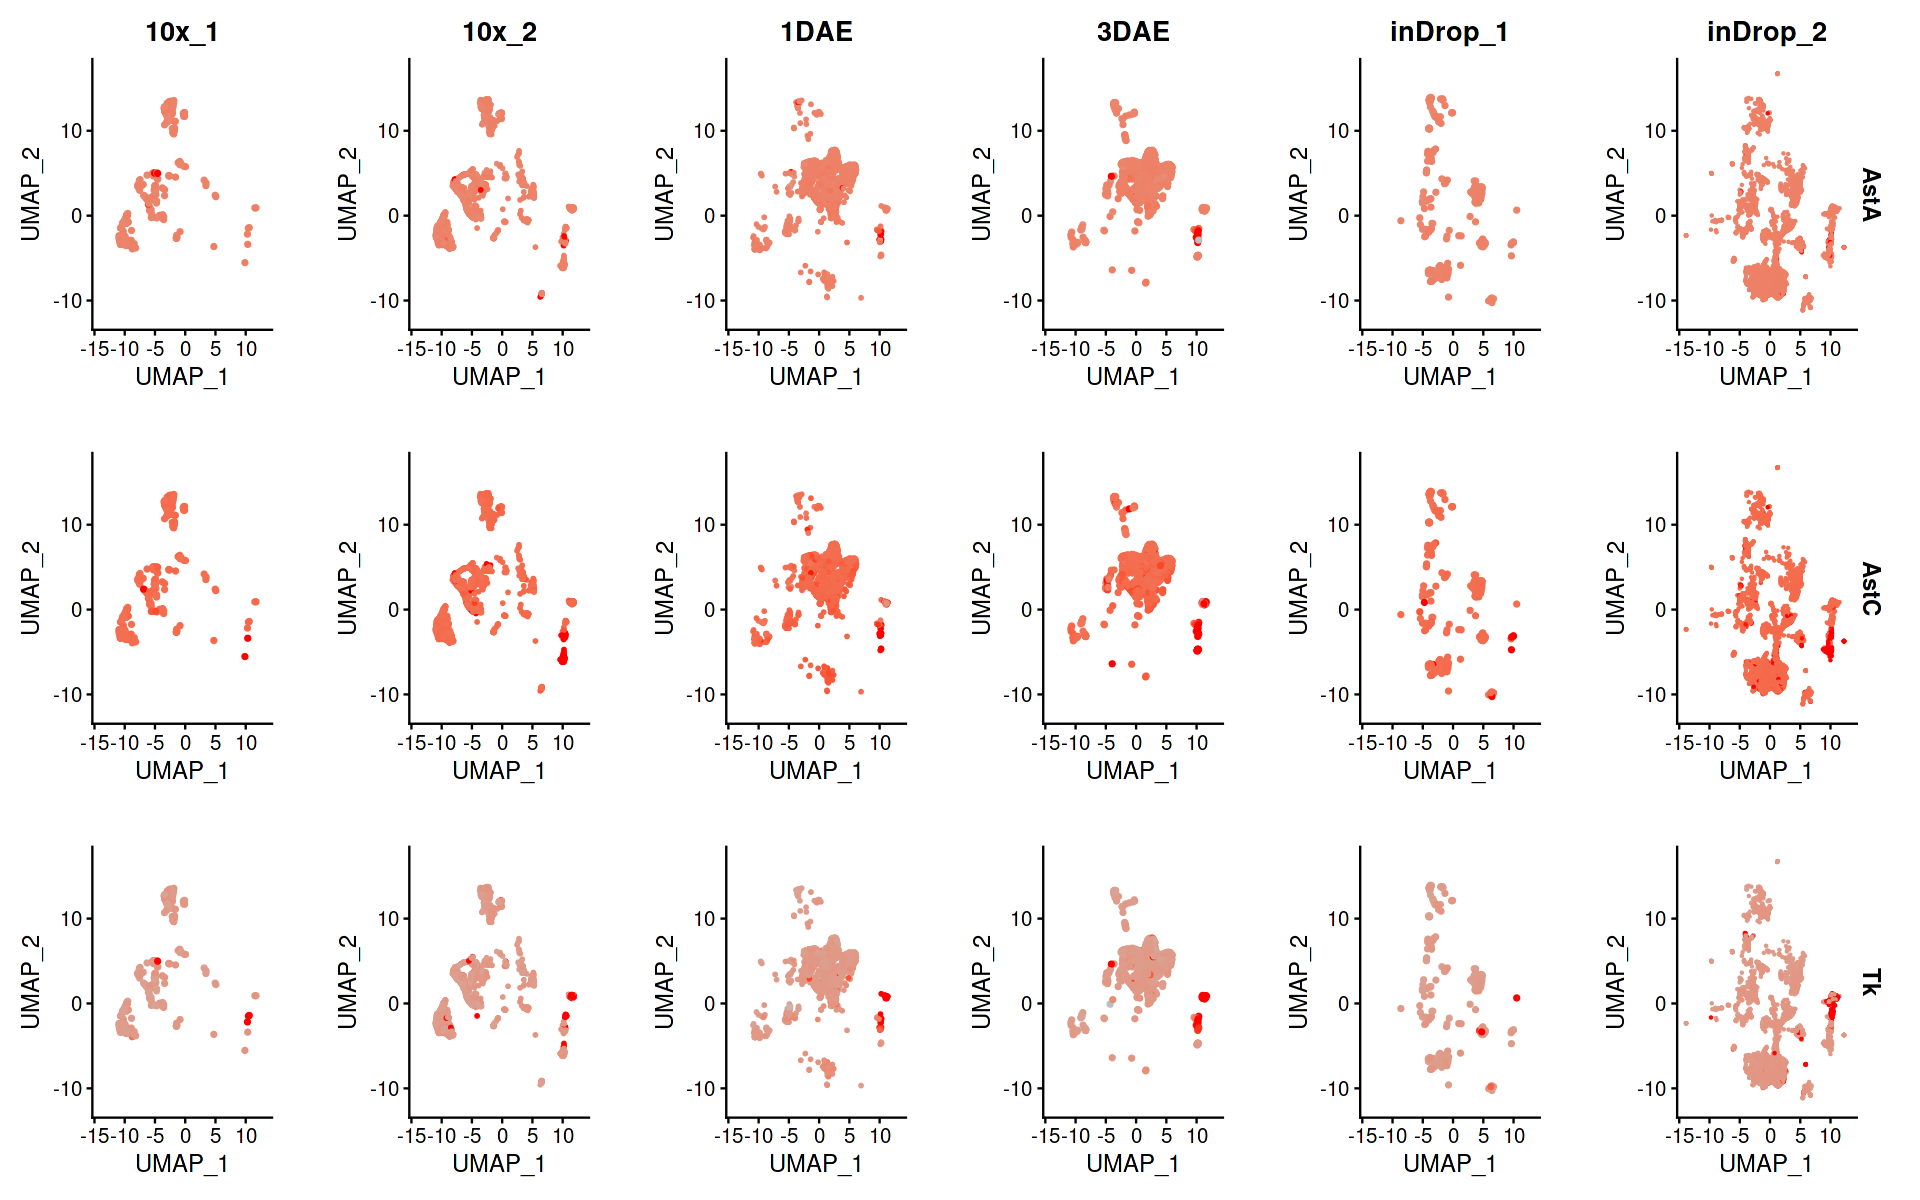

In [53]:
markergenes2 <- c("AstA", "AstC", "Tk")

FeaturePlot(combined.sct, features = markergenes2, 
            split.by = "sample", max.cutoff = 3,
            cols = c("grey", "red"))

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

ERROR while rich displaying an object: Error in grid.Call.graphics(C_raster, x$raster, x$x, x$y, x$width, x$height, : Empty raster

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in 

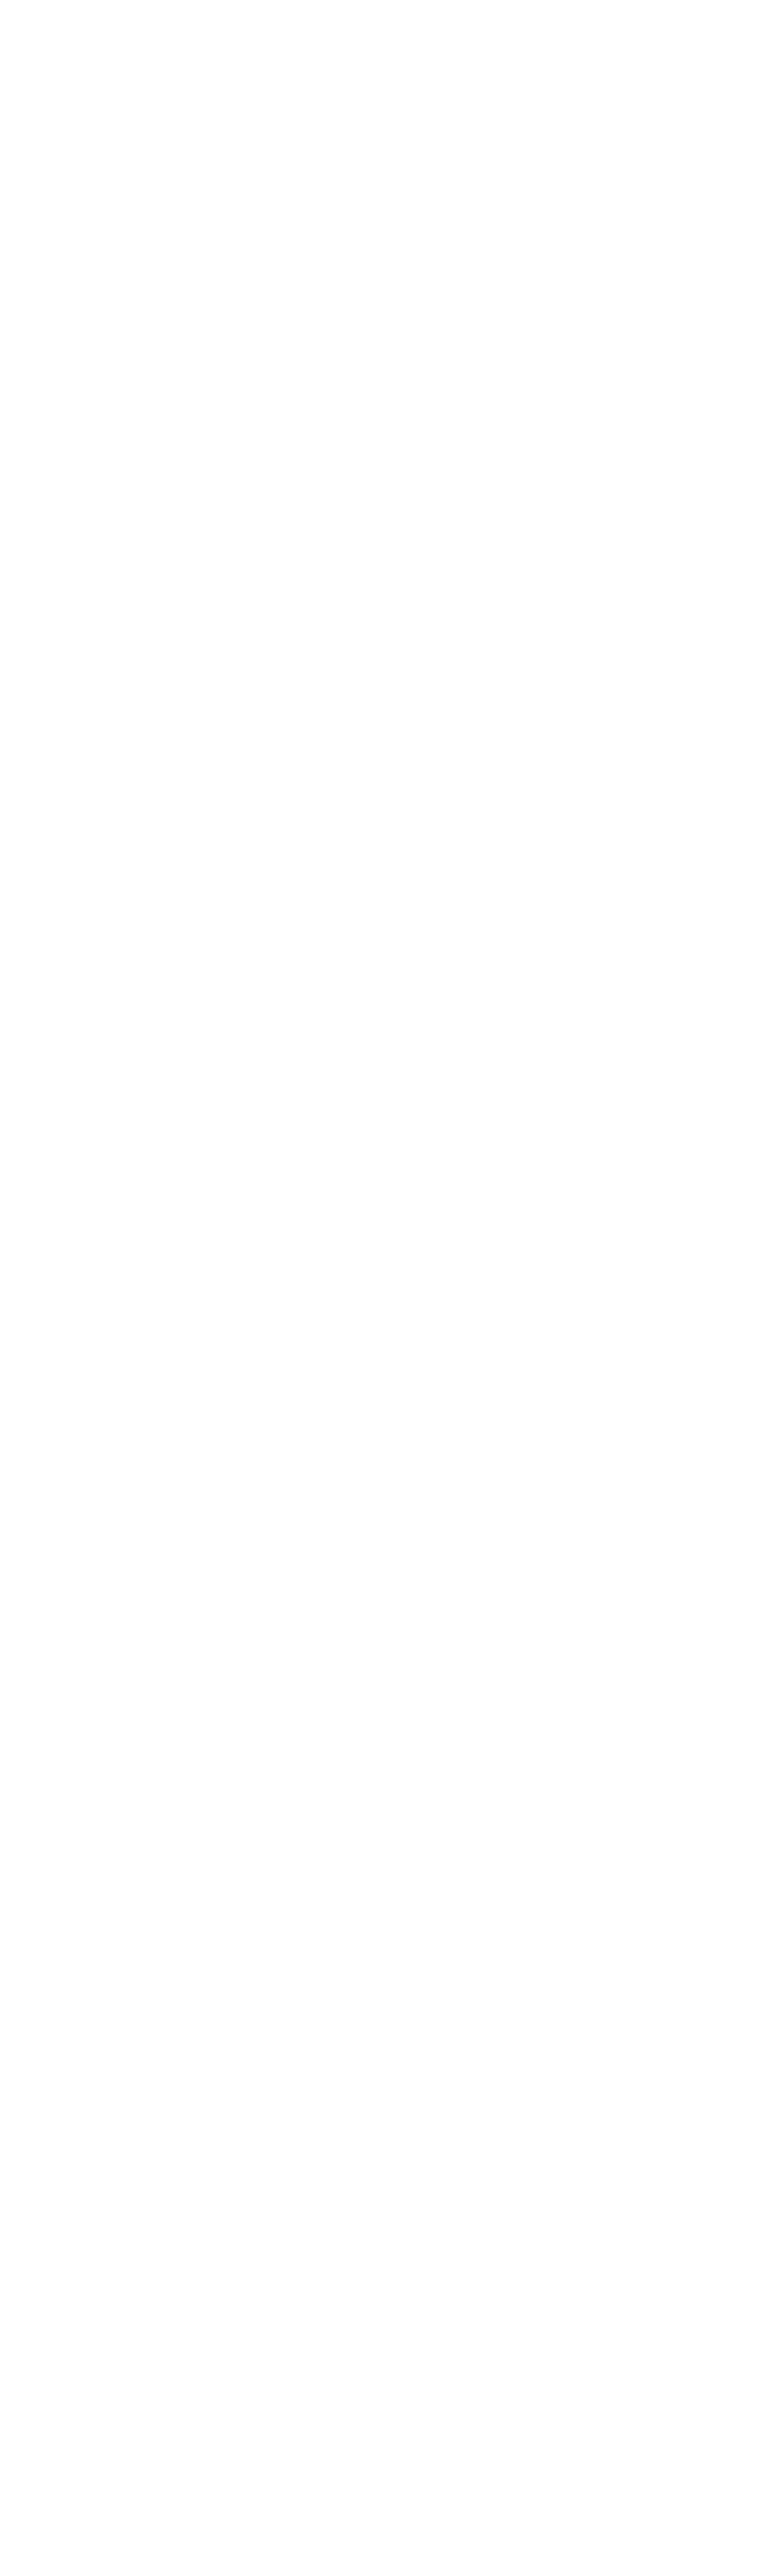

In [54]:
plots <- VlnPlot(combined.sct, features = markergenes, split.by = "sample", group.by = "orig.ident",
    pt.size = 1, combine = FALSE)

options(repr.plot.width = 12, repr.plot.height = 40)
wrap_plots(plots = plots, ncol = 1)

In [55]:
# findMarkers in the new integrated object
# Identify DEGs 

# search for positive markers
combined.markers <- FindAllMarkers(
  object = combined.sct,
  assay = NULL,
  features = NULL,
  logfc.threshold = 0.25,
  test.use = "wilcox",
  slot = "data",
  min.pct = 0.1,
  min.diff.pct = -Inf,
  node = NULL,
  verbose = TRUE,
  only.pos = TRUE,
  max.cells.per.ident = Inf,
  random.seed = 1,
  latent.vars = NULL,
  min.cells.feature = 3,
  min.cells.group = 3,
  pseudocount.use = 1,
  mean.fxn = NULL,
  fc.name = NULL,
  base = 2,
  return.thresh = 0.01,
  densify = FALSE,
)


combined.markers$gene <- row.names(combined.markers)
combined.markers <- combined.markers %>% filter(p_val_adj < 0.05)

# view results
head(combined.markers, 10)

Calculating cluster our_Tk+EE

Calculating cluster our_mEC

Calculating cluster our_ISC2

Calculating cluster our_ISC1

Calculating cluster our_EC-like

Calculating cluster our_EB3

Calculating cluster our_EB2

Calculating cluster our_EB1

Calculating cluster our_AstC

Calculating cluster our_apEC

Calculating cluster aEC1

Calculating cluster aEC2

Calculating cluster aEC3

Calculating cluster aEC4

Calculating cluster AstA-EE

Calculating cluster AstC-EE

Calculating cluster cardia

Calculating cluster copper and iron cell

Calculating cluster dEC

Calculating cluster EC-like1

Calculating cluster EC-like2

Calculating cluster EC-like3

Calculating cluster ISC/EB

Calculating cluster LFC

Calculating cluster NPF-EE

Calculating cluster others

Calculating cluster pEC1

Calculating cluster pEC2

Calculating cluster pEC3

Calculating cluster unk1

Calculating cluster unk2



p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster   gene   
CG42540 2.779144e-36 1.1174705  1.000 0.006 5.558287e-33 our_Tk+EE CG42540
Tk      1.626506e-34 2.2063884  1.000 0.069 3.253013e-31 our_Tk+EE Tk     
7B2     2.478692e-34 2.3036081  1.000 0.085 4.957384e-31 our_Tk+EE 7B2    
svr     3.638519e-34 0.3919729  1.000 0.146 7.277039e-31 our_Tk+EE svr    
NPF     5.538895e-34 4.9759518  1.000 0.109 1.107779e-30 our_Tk+EE NPF    
CG10970 1.991922e-32 1.5545307  0.944 0.096 3.983845e-29 our_Tk+EE CG10970
IA-2    3.142869e-32 4.4226224  1.000 0.138 6.285737e-29 our_Tk+EE IA-2   
CG4781  2.754373e-14 2.6130378  0.796 0.204 5.508746e-11 our_Tk+EE CG4781 
veil    4.869107e-14 8.4842241  0.148 0.207 9.738213e-11 our_Tk+EE veil   
CG8907  3.083794e-11 0.3190868  0.148 0.150 6.167589e-08 our_Tk+EE CG8907

In [56]:
length(rownames(combined.markers))

[1] 3269

In [57]:
ngenes <- 2

topmarkers <- combined.markers %>% group_by(cluster) %>% top_n(n = ngenes, wt = p_val_adj)
head(topmarkers)

genelist <- topmarkers$gene

length(genelist)
head(genelist)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster   gene  
1  3.083794e-11 0.3190868  0.148 0.150  6.167589e-08 our_Tk+EE CG8907
2  1.507869e-09 0.6617442  0.074 0.125  3.015738e-06 our_Tk+EE PIG-Wb
3  2.367802e-05 3.2447663  0.150 0.141  4.735605e-02 our_mEC   Fdx1  
4  2.479062e-05 2.3248365  0.174 0.157  4.958124e-02 our_mEC   ringer
5 4.928442e-171 1.6842206  0.821 0.087 9.856885e-168 our_ISC2  Dl    
6  2.701336e-48 1.7180243  0.053 0.207  5.402671e-45 our_ISC2  CG2930

[1] 62

[1] "CG8907" "PIG-Wb" "Fdx1"   "ringer" "Dl"     "CG2930"

In [58]:
# make heatmap of expression using the DEGs identified between AstC+EE and TK+EE 
# Include all other cell types as well
cluster.averages = AverageExpression(combined.sct, return.seurat=TRUE, group.by=c('ident'))

Centering and scaling data matrix



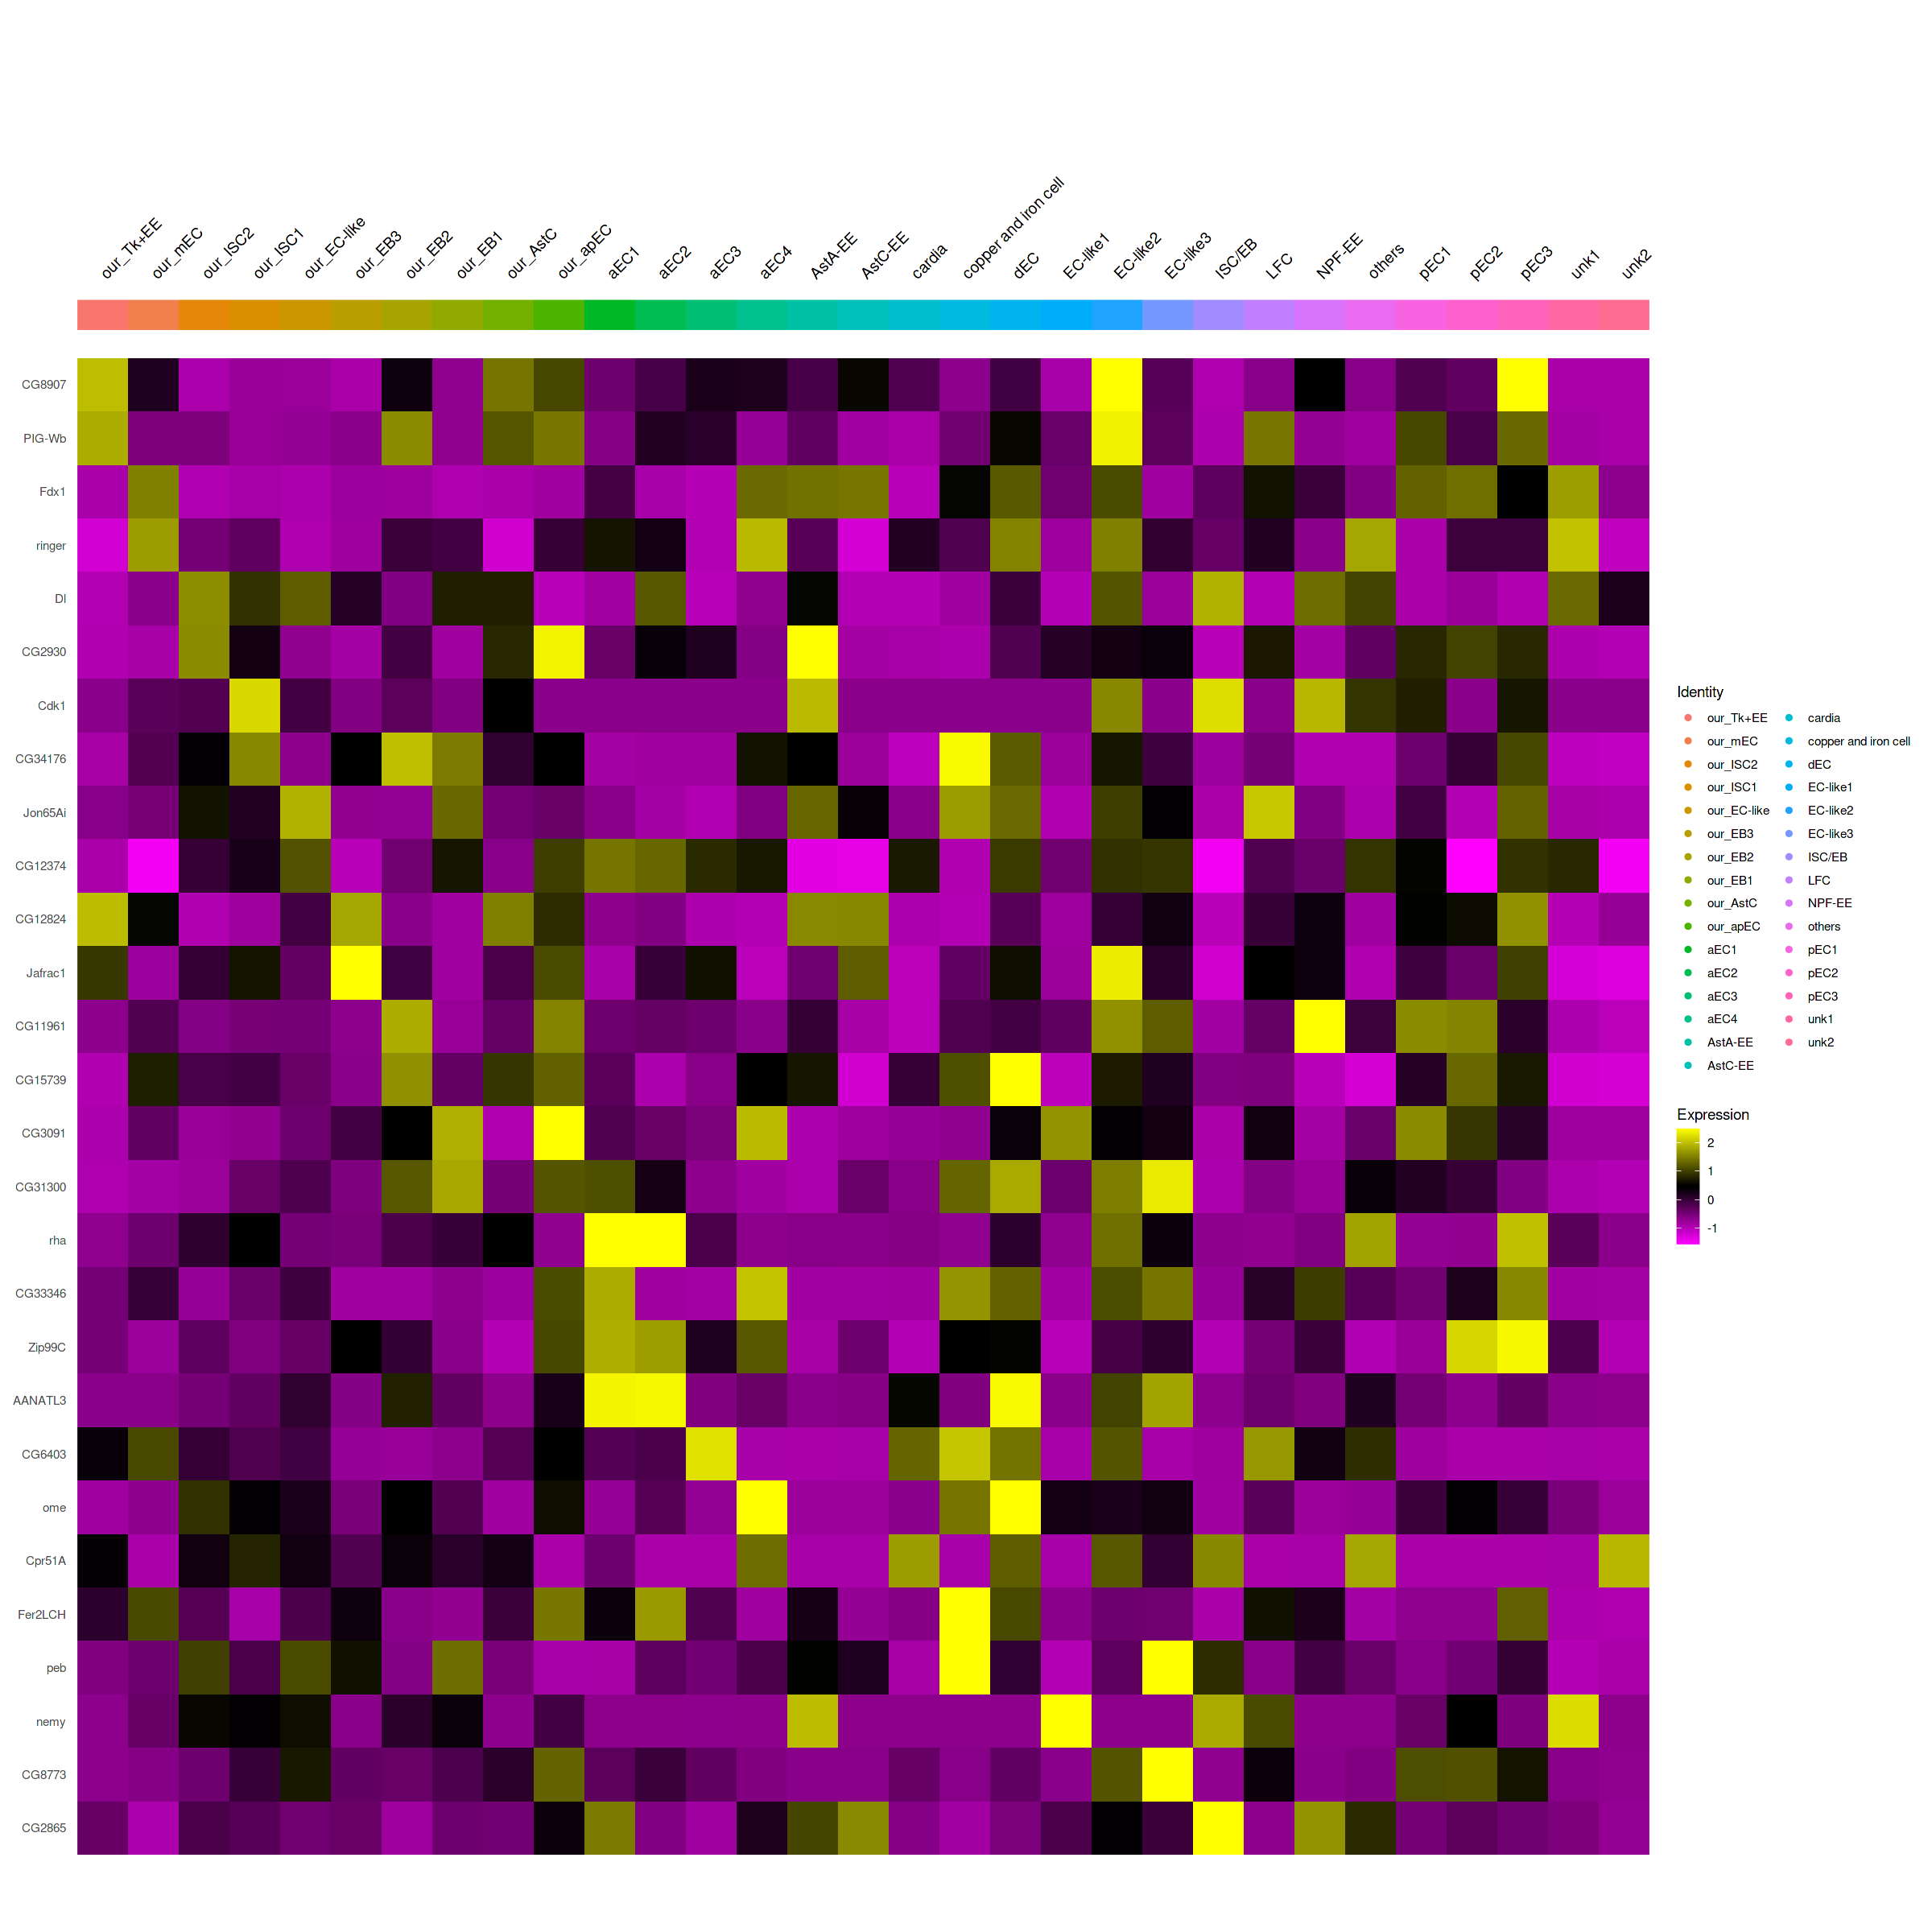

In [87]:
#PLOT
options(repr.plot.width = 20, repr.plot.height = 20)
DoHeatmap(cluster.averages, features=genelist, size=4, draw.lines = FALSE)

In [60]:
head(combined.markers)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster   gene   
CG42540 2.779144e-36 1.1174705  1.000 0.006 5.558287e-33 our_Tk+EE CG42540
Tk      1.626506e-34 2.2063884  1.000 0.069 3.253013e-31 our_Tk+EE Tk     
7B2     2.478692e-34 2.3036081  1.000 0.085 4.957384e-31 our_Tk+EE 7B2    
svr     3.638519e-34 0.3919729  1.000 0.146 7.277039e-31 our_Tk+EE svr    
NPF     5.538895e-34 4.9759518  1.000 0.109 1.107779e-30 our_Tk+EE NPF    
CG10970 1.991922e-32 1.5545307  0.944 0.096 3.983845e-29 our_Tk+EE CG10970

In [61]:
# To show how similar two clusters are in these integrated object
# we use the Dimensional reduced structure 
# information is from this site
# https://satijalab.org/seurat/archive/v3.0/dim_reduction_vignette.html

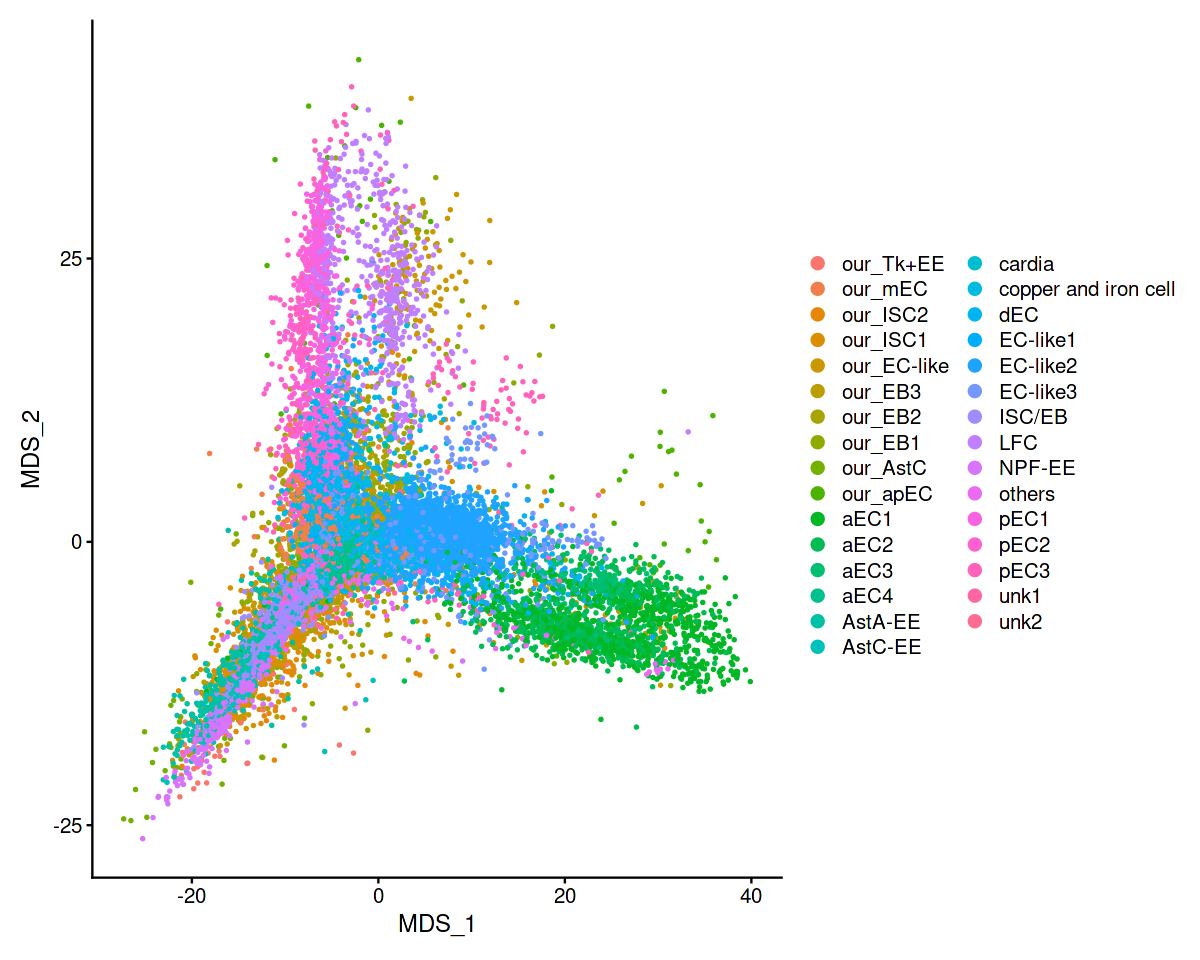

In [63]:
options(repr.plot.width = 10, repr.plot.height = 8)
# We can now use this as you would any other dimensional reduction in all downstream functions
DimPlot(combined.sct, reduction = "mds", pt.size = 0.5)

In [64]:
# If you wold like to observe genes that are strongly correlated with the first MDS coordinate
combined.sct <- ProjectDim(combined.sct, reduction = "mds")

MDS_ 1 
Positive:  betaTry, alphaTry, CG12374, Bace, Jon65Aiv, Jon99Cii, Jon99Ciii, Jon65Aiii, CG30025, Diedel3 
	   epsilonTry, yip7, CG5107, CG6295, Pebp1, Mal-A1, CG7542, deltaTry, Jon25Bii, CG17192 
Negative:  sty, Df31, hdc, E(spl)mbeta-HLH, Tet, IA-2, 7B2, cib, N, bun 
	   fru, nrv3, Dl, Nrg, E(spl)malpha-BFM, Phm, MtnA, fkh, His3.3B, cpo 
MDS_ 2 
Positive:  Acbp5, CG11911, CG10472, CG31343, CG17571, CG12057, Jon25Biii, Jon99Fii, Jon65Aii, Jon99Fi 
	   CG8997, CG31198, lambdaTry, MtnA, LManVI, CG33306, CG7916, LManII, CG17633, CG43349 
Negative:  betaTry, Bace, CG12374, alphaTry, sty, IA-2, hdc, E(spl)mbeta-HLH, Df31, 7B2 
	   CG30025, Tet, fru, Dl, N, trol, fmt, nrv3, Jon65Aiv, Phm 


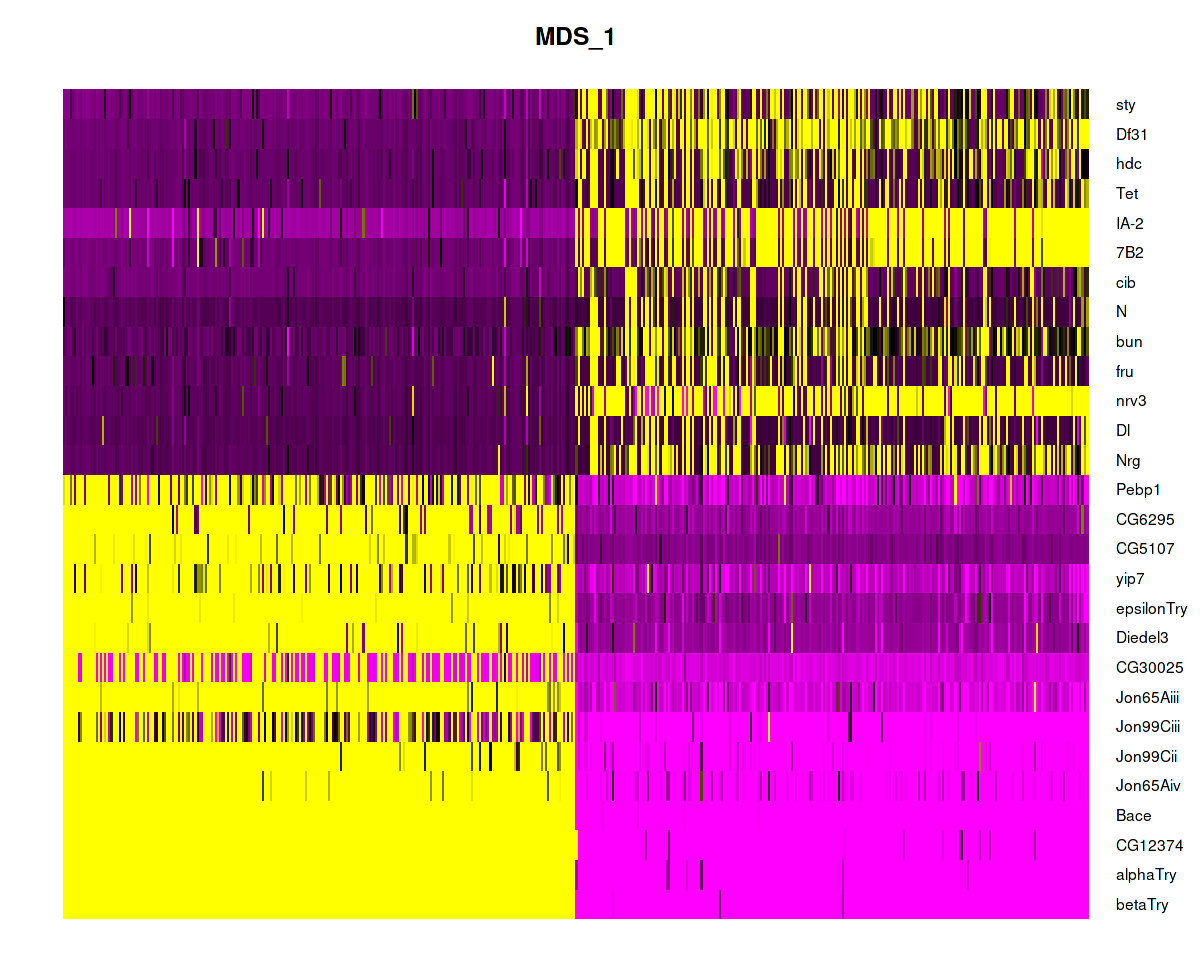

In [65]:
# Display the results as a heatmap
DimHeatmap(combined.sct, reduction = "mds", dims = 1, cells = 500, projected = TRUE, balanced = TRUE)

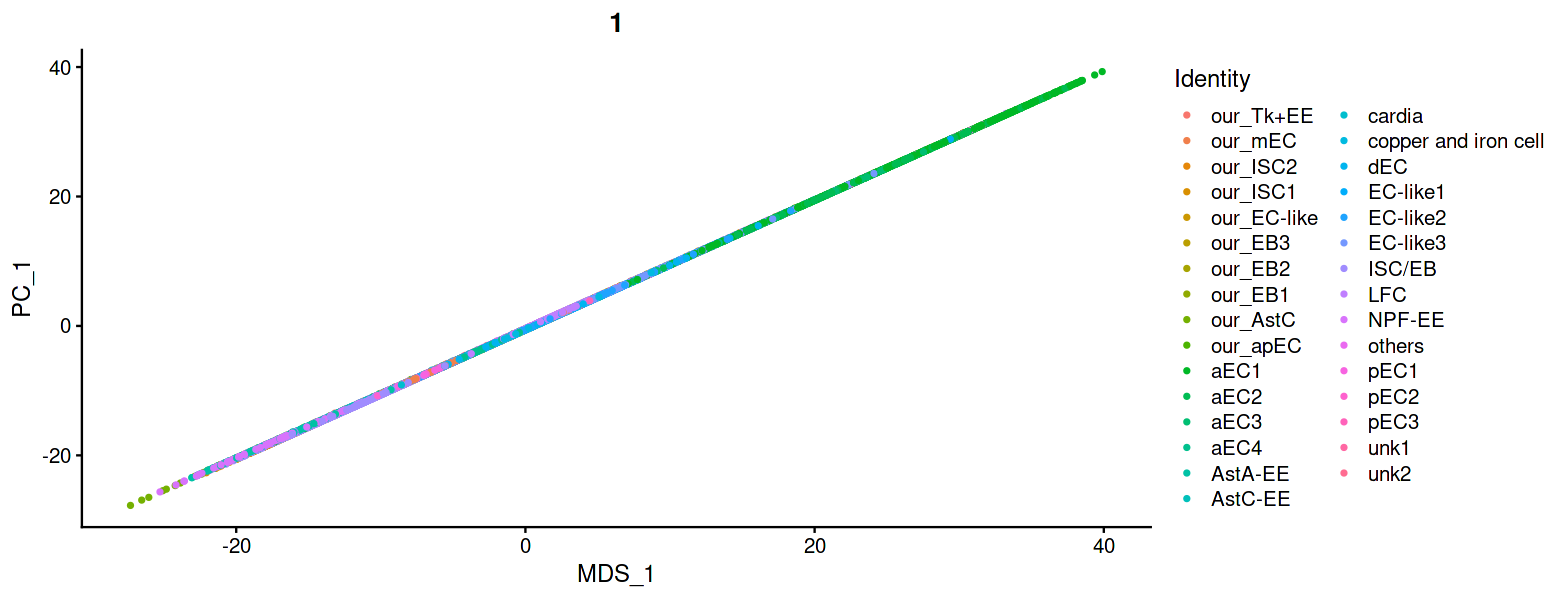

In [67]:
# See how the first MDS dimension is correlated with the first PC dimension
FeatureScatter(combined.sct, feature1 = "MDS_1", feature2 = "PC_1")

In [29]:
library(scater)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQR

In [30]:
#  Convert seurat to sce
sce <- as.SingleCellExperiment(so)

In [31]:
sce <- addPerCellQC(sce, subsets = list(Mito=grep("^mt:", rownames(sce))))

In [32]:
# Variable-level metrics are computed by the getVarianceExplained() function (after normalization, see below). 
# This calculates the percentage of variance of each gene’s expression that is explained by each variable in the 
# colData of the SingleCellExperiment object. We can then use this to determine which experimental factors are 
# contributing most to the variance in expression. This is useful for diagnosing batch effects or to quickly verify 
# that a treatment has an effect.

# Computing variance explained on the log-counts,
# so that the statistics reflect changes in relative expression.
sce <- logNormCounts(sce) 
sce

class: SingleCellExperiment 
dim: 9607 4184 
metadata(0):
assays(2): counts logcounts
rownames(9607): l(2)gl Ir21a ... mt:ND3 mt:ND6
rowData names(0):
colnames(4184): 1DAE_1DAE:AACCATGGTAAGCAATx 1DAE_1DAE:AACCCAAAGCTATCTGx
  ... 3DAE_3DAE:TTTCCTCTCGGTAGGAx 3DAE_3DAE:TTGTGTTCAGCGGTCTx
colData names(58): orig.ident nCount_spliced ... total sizeFactor
reducedDimNames(2): PCA UMAP
altExpNames(4): SCT unspliced ambiguous RNA

In [36]:
str(sce)

Formal class 'SingleCellExperiment' [package "SingleCellExperiment"] with 9 slots
  ..@ int_elementMetadata:Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. ..@ rownames       : NULL
  .. .. ..@ nrows          : int 9607
  .. .. ..@ listData       :List of 1
  .. .. .. ..$ rowPairs:Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. .. .. .. ..@ rownames       : NULL
  .. .. .. .. .. ..@ nrows          : int 9607
  .. .. .. .. .. ..@ listData       : Named list()
  .. .. .. .. .. ..@ elementType    : chr "ANY"
  .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. ..@ metadata       : list()
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ int_colData        :Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. ..@ rownames       : NULL
  .. .. ..@ nrows          : int 4184
  .. .. ..@ listData       :List of 3
  .. .. .. ..$ reducedDims:Formal class 'DFrame' [package "S4Vect

In [39]:
vars <- getVarianceExplained(sce, 
    variables=c("sample", "seurat_clusters", "sizeFactor", "predicted.id", "percent.mt"))

#    variables=c("sample", "seurat_clusters", "S.Score", "G2M.Score", "Phase", "subsets_Mito_percent", "sizeFactor"))

head(vars)

sample      seurat_clusters sizeFactor  predicted.id percent.mt  
l(2)gl  0.852237660 15.0685768      0.092914805 15.0688191   2.082732e+00
Ir21a   0.013892168  1.7665834      0.009536528  1.7574236   3.169951e-05
Cda5    0.185336209  0.7358708      0.245524123  0.8305948   6.366264e-03
net     0.182925353  0.6304237      0.597321423  0.6332916   9.809718e-02
Nhe1    0.389979030  7.3801256      0.444515663  7.4722851   4.134777e-01
CG13694 0.007987074  1.1227237      0.205491726  1.1847385   7.324166e-02

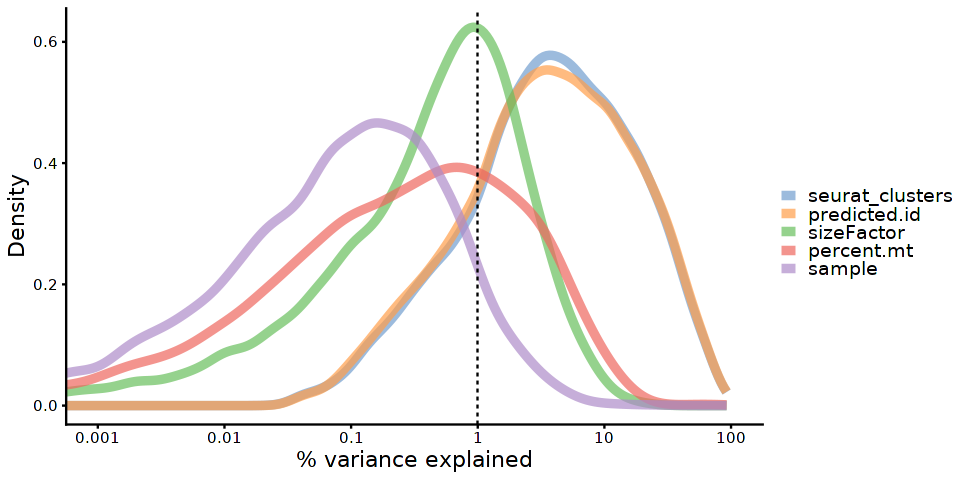

In [49]:
# This plot show the contribution of variables to the variance
# In this case the most important is the clusters. That make sense to explain the
# differences among cell types. 
# However, my classification was worse than the raw 23 clusters
# My guess is that I merged bigger clusters to same, which may contain subcluster differences

options(repr.plot.width = 8, repr.plot.height = 4)
plotExplanatoryVariables(vars) +
            theme(text = element_text(size = 13))

In [ ]:
pop.plot <- pop %>%
    dplyr::select(sample, percent) %>%
    unnest() %>%
    tidyr::pivot_longer(cols = -sample, names_to = "cluster", values_to = "props")


## change as.factor
pop.plot$condition <- factor(pop.plot$sample, levels = c("contMS","contRN","C1-1","C1-2","C2-1","C2-2","E2-1","E2-2","S43","Y3-1"))
pop.plot$cluster   <- factor(pop.plot$cluster)


ggColorHue <- function(n, l=65) {
  hues <- seq(15, 375, length=n+1)
  hcl(h=hues, l=l, c=100)[1:n]
}

color_clusters <- ggColorHue(n=nlevels(pop.plot$cluster))
names(color_clusters) <- c(0:(nlevels(pop.plot$cluster)-1))

In [93]:
# Compare the correlation of Hung's data to our clusters

pop.2 <- as.data.frame.matrix(table(so$SCT_snn_res.0.3, so$sample)) %>%
    rownames_to_column("cluster") %>%
    mutate(cluster.ncell = rowSums(.[2:ncol(.)])) %>%
    nest(-cluster, -cluster.ncell) %>%
    group_by(cluster) %>%
    mutate(percent = map(data, ~100*./cluster.ncell))

pop.plot.2 <- pop.2 %>%
    dplyr::select(cluster, percent) %>%
    unnest() %>%
    tidyr::pivot_longer(cols = -cluster, names_to = "sample", values_to = "props")

## change as.factor
pop.plot.2$condition <- factor(pop.plot.2$cluster)
pop.plot.2$sample <- factor(pop.plot.2$sample, levels = c('EB1','ISC1','ISC2','EC-like','EB3','EB2','mEC','AstC+EE','apEC','Tk+EE'))

In [94]:
ggColorHue <- function(n, l=65) {
  hues <- seq(15, 375, length=n+1)
  hcl(h=hues, l=l, c=100)[1:n]
}

color_clusters <- ggColorHue(n=nlevels(pop.plot.2$cluster))
names(color_clusters) <- c(0:(nlevels(pop.plot.2$cluster)-1))

color_sample <- ggColorHue(n=nlevels(pop.plot.2$sample))
names(color_sample) <- c('EB1','ISC1','ISC2','EC-like','EB3','EB2','mEC','AstC+EE','apEC','Tk+EE')

ERROR: Error in names(color_clusters) <- c(0:(nlevels(pop.plot.2$cluster) - 1)): 'names' attribute [2] must be the same length as the vector [1]


In [45]:
options(repr.plot.width = 12, repr.plot.height = 6)

p <- ggplot(pop.plot.2, aes(x = condition, y = props, fill = cluster)) +
                          geom_bar(stat = "identity") +
#  facet_wrap(~ condition, scales = "free_x") +
                          theme_bw() +
                          theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
                          scale_fill_manual(values = color_clusters) 
p

ERROR: Error in is_reference(x, quote(expr = )):  オブジェクト 'color_clusters' がありません 


In [52]:
unique(combined.sct$orig.ident)

[1] "SeuratProject"

In [ ]:
unique(combined.sct

In [49]:
str(combined.sct)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 5
  .. ..$ unspliced :Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2192951] 0 7 15 37 54 88 120 199 209 221 ...
  .. .. .. .. .. ..@ p       : int [1:14790] 0 714 1231 1628 1905 2257 2626 2821 3192 3668 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 13963 14789
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:13963] "l(2)gl" "Ir21a" "Cda5" "net" ...
  .. .. .. .. .. .. ..$ : chr [1:14789] "1DAE_1DAE:AACCATGGTAAGCAATx" "1DAE_1DAE:AACCCAAAGCTATCTGx" "1DAE_1DAE:AAAGGATTCTTGTGCCx" "1DAE_1DAE:AACAAAGAGAATAGTCx" ...
  .. .. .. .. .. ..@ x       : num [1:2192951] 5 3 4 1 2 1 7 1 2 3 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:219

In [ ]:
# test

# CCA method

In [42]:
# Query data
nagai <- readRDS('Seurat_aggr_HN.rds')
nagai <- SCTransform(nagai, verbose = FALSE)
nagai

An object of class Seurat 
16852 features across 4104 samples within 2 assays 
Active assay: SCT (8426 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

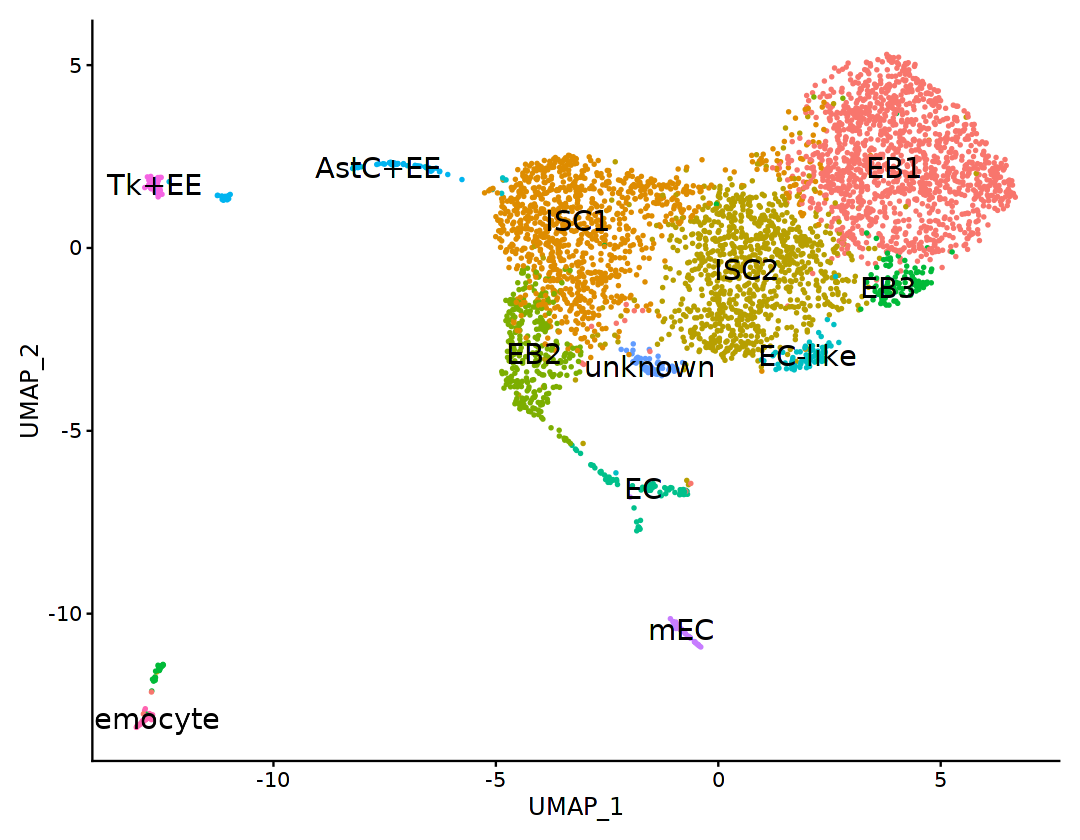

In [43]:
options(repr.plot.width = 9, repr.plot.height = 7)
DimPlot(nagai, reduction = "umap", label = TRUE, pt.size = 0.5, label.size = 6) + NoLegend()

In [47]:
nagai <- RunUMAP(nagai, nn.name = "weighted.nn", reduction.name = "wnn.umap", 
              reduction.key = "wnnUMAP_", return.model = TRUE)

ERROR: Error: Cannot find 'weighted.nn' in this Seurat object


In [ ]:
DimPlot(bm, group.by = "celltype.l2", reduction = "wnn.umap") 

In [44]:
# Reference data
hung <- readRDS(file.path("Hung_etal_2020", "results", "hung2020.rds"))
hung <- SCTransform(hung, verbose = FALSE)
hung

An object of class Seurat 
27048 features across 10605 samples within 2 assays 
Active assay: SCT (10109 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: umap

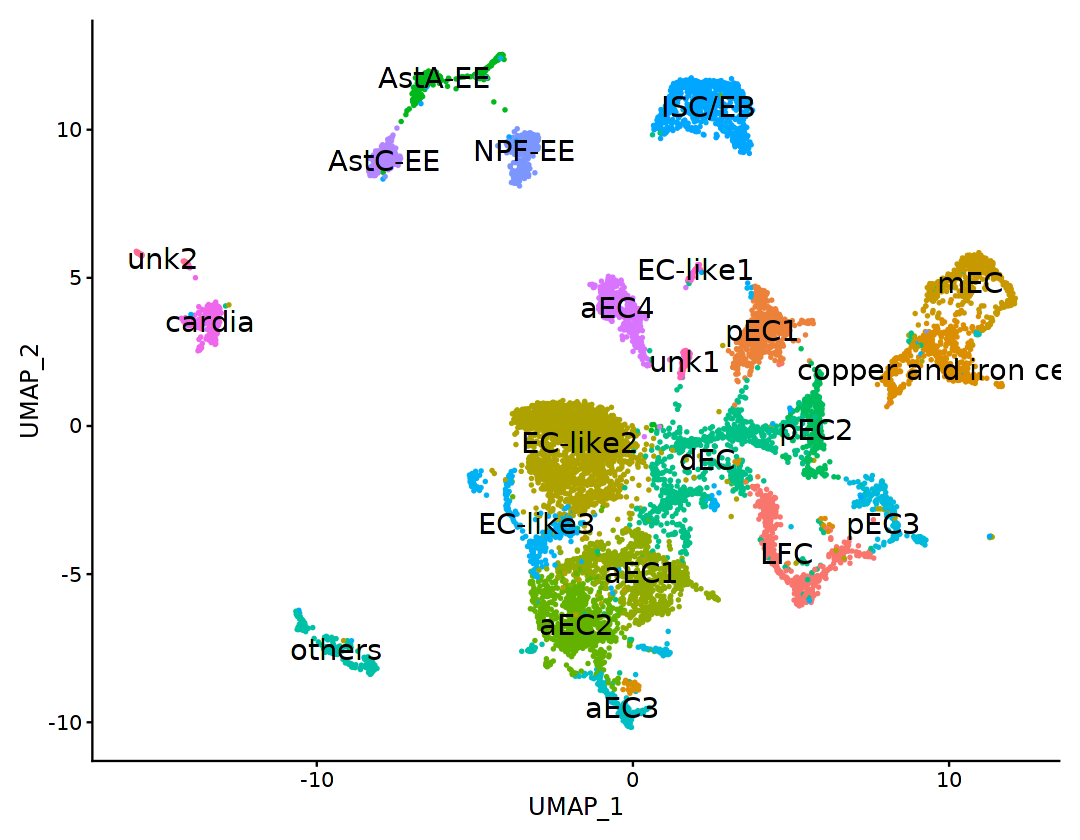

In [45]:
options(repr.plot.width = 9, repr.plot.height = 7)
DimPlot(hung, reduction = "umap", label = TRUE, pt.size = 0.5, label.size = 6) + NoLegend()

In [46]:
anchors <- FindTransferAnchors(
  reference = hung,
  query = nagai,
  normalization.method = "SCT",
  reference.reduction = "spca",
  dims = 1:30
)

Normalizing query using reference SCT model



ERROR: Error: reference.reduction (spca) is not present in the provided reference object.


In [ ]:
pbmc3k <- MapQuery(
  anchorset = anchors,
  query = pbmc3k,
  reference = reference,
  refdata = list(
    celltype.l1 = "celltype.l1",
    celltype.l2 = "celltype.l2",
    predicted_ADT = "ADT"
  ),
  reference.reduction = "spca", 
  reduction.model = "wnn.umap"
)

In [39]:
remotes::install_github("satijalab/seurat", ref = "release/4.0.0")

Rcpp         (1.0.6      -> 1.0.7     ) [CRAN]
utf8         (1.2.1      -> 1.2.2     ) [CRAN]
cli          (2.5.0      -> 3.0.1     ) [CRAN]
spatstat.... (2.1-0      -> 2.2-0     ) [CRAN]
spatstat.... (2.1-2      -> 2.3-0     ) [CRAN]
spatstat.... (2.1-0      -> 2.2-2     ) [CRAN]
sass         (0.3.1      -> 0.4.0     ) [CRAN]
stringi      (1.6.2      -> 1.7.3     ) [CRAN]
parallelly   (1.24.0     -> 1.27.0    ) [CRAN]
colorspace   (2.0-1      -> 2.0-2     ) [CRAN]
gtools       (3.8.2      -> 3.9.2     ) [CRAN]
pillar       (1.6.1      -> 1.6.2     ) [CRAN]
tibble       (3.1.2      -> 3.1.3     ) [CRAN]
cpp11        (0.2.7      -> 0.3.1     ) [CRAN]
dplyr        (1.0.6      -> 1.0.7     ) [CRAN]
mime         (0.10       -> 0.11      ) [CRAN]
curl         (4.3.1      -> 4.3.2     ) [CRAN]
cachem       (1.0.4      -> 1.0.5     ) [CRAN]
bslib        (0.2.4      -> 0.2.5.1   ) [CRAN]
httpuv       (1.6.0      -> 1.6.1     ) [CRAN]
isoband      (0.2.4      -> 0.2.5     ) [CRAN]
RcppAnnoy    

Installing 32 packages: Rcpp, utf8, cli, spatstat.utils, spatstat.core, spatstat.geom, sass, stringi, parallelly, colorspace, gtools, pillar, tibble, cpp11, dplyr, mime, curl, cachem, bslib, httpuv, isoband, RcppAnnoy, spatstat.linnet, RcppArmadillo, matrixStats, ggplot2, future.apply, reticulate, spatstat, plotly, leiden, fitdistrplus

Installing packages into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpT2yrIz/remotes14cbd4854d70f/satijalab-seurat-85aabd7/DESCRIPTION’ (840ms)
─  preparing ‘Seurat’: (1.9s)
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts (1s)
─  checking for empty or unneeded directories
─  building ‘Seurat_3.9.9.9038.tar.gz’
   


Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [ ]:
# To exclude unwanted clusters
tirosh_seurat_1 = subset(tirosh_seurat, idents = c("-1", "12","14","6"), invert = TRUE)

In [ ]:
# also interesting discussion for heatmap plot
https://github.com/satijalab/seurat/issues/2201


In [41]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=ja_JP.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=ja_JP.UTF-8        LC_COLLATE=ja_JP.UTF-8    
 [5] LC_MONETARY=ja_JP.UTF-8    LC_MESSAGES=ja_JP.UTF-8   
 [7] LC_PAPER=ja_JP.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=ja_JP.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] SeuratDisk_0.0.0.9019 viridis_0.6.1         viridisLite_0.4.0    
 [4] patchwork_1.1.1       forcats_0.5.1         stringr_1.4.0        
 [7] dplyr_1.0.7           purrr_0.3.4           readr_2.0.0          
[10] tidyr_1.1.3           tibble_3.1.3          ggpl